In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [4]:
df=pd.read_excel('Customer Churn Data.xlsx','Data for DSBA')

In [5]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [6]:
df.shape

(11260, 19)

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

The rev_growth_yoy, coupon_used_for_payment, Day_Since_CC_connect & cashback are all object types which ideally should be int or float. To change the data tye however the anomalies & null values have to be fixed.

#### Check for duplicates

In [9]:
df.duplicated().sum()

0

#### Null values in each column

In [10]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

#### % of Null values

In [11]:
round((df.isnull().sum()/df.shape[0])* 100,2).sum()

23.759999999999998

#### Percentage of Null value is very high, one fourth of the data will be lost is these are dropped. So let's try to impute these values after analysing each column one by one

In [12]:
round((df.isnull().sum()/df.shape[0])* 100,2)

AccountID                  0.00
Churn                      0.00
Tenure                     0.91
City_Tier                  0.99
CC_Contacted_LY            0.91
Payment                    0.97
Gender                     0.96
Service_Score              0.87
Account_user_count         0.99
account_segment            0.86
CC_Agent_Score             1.03
Marital_Status             1.88
rev_per_month              0.91
Complain_ly                3.17
rev_growth_yoy             0.00
coupon_used_for_payment    0.00
Day_Since_CC_connect       3.17
cashback                   4.18
Login_device               1.96
dtype: float64

The NULL values present in each column is less than 5%

#### Let's check for anomalies 

In [13]:
(df==0).sum()

AccountID                     0
Churn                      9364
Tenure                     1231
City_Tier                     0
CC_Contacted_LY               0
Payment                       0
Gender                        0
Service_Score                 8
Account_user_count            0
account_segment               0
CC_Agent_Score                0
Marital_Status                0
rev_per_month                 0
Complain_ly                7792
rev_growth_yoy                0
coupon_used_for_payment    2150
Day_Since_CC_connect        964
cashback                      4
Login_device                  0
dtype: int64

#### Let's check the zeros present are logical or anomalies

In [14]:
df[(df['Tenure'] ==0)]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8408,28408,0,0,3.0,17.0,UPI,Female,2.0,3,Super,3.0,Married,3,1.0,24,0,4,149.07,Mobile
8413,28413,1,0,3.0,17.0,E wallet,Male,2.0,3,Regular Plus,5.0,Married,5,0.0,21,1,0,124.9,Computer
8417,28417,1,0,1.0,13.0,Credit Card,Male,2.0,3,Regular Plus,1.0,Married,12,1.0,16,2,2,147.87,Mobile
8439,28439,0,0,3.0,17.0,UPI,Female,1.0,4,Regular Plus,3.0,NaN,2,0.0,19,1,0,132.66,Mobile


In [15]:
df['Complain_ly'].value_counts()

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

In [16]:
df[df['cashback']==0]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
101,20101,0,10,3.0,10.0,E wallet,Male,2.0,3,Regular Plus,2.0,Married,5,0.0,17,1,NaN,0,Computer
1026,21026,0,1,1.0,33.0,Credit Card,Female,2.0,5,Super,5.0,Married,1,0.0,21,1,0,0,Mobile
1176,21176,0,30,3.0,8.0,Credit Card,Male,2.0,3,Super Plus,4.0,Married,5,0.0,22,10,14,0,Computer
1255,21255,0,8,3.0,24.0,Credit Card,Male,3.0,3,Super,5.0,Married,1,0.0,16,0,4,0,Mobile


#### Seems like the '0s' are logical and should be kept as it is

#### Let's check for presence of any special character 


In [17]:
char = ('*','$', '&', '#','@','+','_','-','!','?')
type(char)

tuple

In [18]:
#df.isin([char]).sum()
for i in char:
    a=df.isin([i]).sum().sum()
    if (a !=0):
        print(i,'is prsent', a,'times')
    else:
        continue

* is prsent 1 times
$ is prsent 7 times
# is prsent 117 times
@ is prsent 332 times
+ is prsent 689 times


#### Many anomalies could be seen. To impute these value first it has to be converted to Null values 

In [19]:
df2=df.replace(char,np.nan)

#### Let's Check the info now

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

#### Let's Check the Null values & there % after anomalies are converted to NaN

In [21]:
df2.isna().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               221
dtype: int64

In [22]:
round((df2.isnull().sum()/df2.shape[0])* 100,2).sum()

33.94

#### 34% NaN value has to be carefully imputed else it is going to affect the data

In [23]:
## % of NaNs columnwise
round((df2.isnull().sum()/df2.shape[0])* 100,2)

AccountID                  0.00
Churn                      0.00
Tenure                     1.94
City_Tier                  0.99
CC_Contacted_LY            0.91
Payment                    0.97
Gender                     0.96
Service_Score              0.87
Account_user_count         3.94
account_segment            0.86
CC_Agent_Score             1.03
Marital_Status             1.88
rev_per_month              7.02
Complain_ly                3.17
rev_growth_yoy             0.03
coupon_used_for_payment    0.03
Day_Since_CC_connect       3.18
cashback                   4.20
Login_device               1.96
dtype: float64

### Now let's analyze columns one by one

### 1. Churn

In [24]:
df.Churn.dtype

dtype('int64')

In [25]:
df.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [26]:
df.Churn.value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

The data is highly imbalanced. Only 17% Churned 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


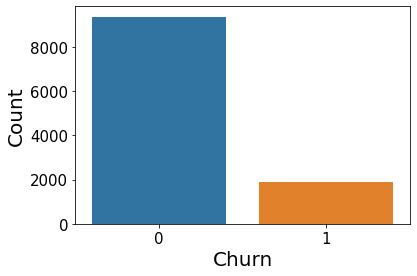

In [27]:
sns.countplot(df2['Churn']);
plt.xlabel('Churn',fontsize=20);
plt.ylabel('Count',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 2. Tenure

In [28]:
df.Tenure.dtype

dtype('O')

In [29]:
df2.Tenure.dtype

dtype('float64')

The data type of the column has need changed to 'float' type after converting the anomalies to NaN values
#### Check for Null values

In [30]:
df2.Tenure.isnull().sum()

218

In [31]:
# % of Null value
(df2.Tenure.isnull().sum()/df2.Tenure.count())*100

1.974280021735193

As the % of Null value is low only 2%, these can be dropped but these can be imputed as well. So let's impute the NaNs with either median value or mean column value. To decide that, Outlier has to be checked.

#### Check for outliers

In [32]:
df2["Tenure"].value_counts().sort_index()

0.0     1231
1.0     1351
2.0      354
3.0      410
4.0      403
5.0      403
6.0      363
7.0      450
8.0      519
9.0      496
10.0     423
11.0     388
12.0     360
13.0     359
14.0     345
15.0     311
16.0     291
17.0     215
18.0     253
19.0     273
20.0     217
21.0     170
22.0     151
23.0     169
24.0     147
25.0     114
26.0     122
27.0     131
28.0     137
29.0     114
30.0     137
31.0      96
50.0       2
51.0       2
60.0       2
61.0       2
99.0     131
Name: Tenure, dtype: int64

#### Assumption:As the Tenure has not been clearly mentioned if it is month or year. Let's assume it to be month as 99 years is not practical. 

* The Tenure ranges from 0 to 99 month

In [33]:
print("25% cutstomers have a Tenure lower than {0: .2f}".format(df2.Tenure.quantile(0.25)),'months')
print("75% cutstomers have a Tenure higher than {0: .2f}".format(df2.Tenure.quantile(0.75)),'months')

Q1=df2.Tenure.quantile(0.05)
Q3=df2.Tenure.quantile(0.75)
IQR=Q3-Q1
print('The Outlier % in Tenure Column:',round(((df2.Tenure < (Q1 - 1.5*IQR)) | (df2.Tenure > (Q3 + 1.5*IQR))).sum()/df2.Tenure.shape[0]* 100,2),'%')

25% cutstomers have a Tenure lower than  2.00 months
75% cutstomers have a Tenure higher than  16.00 months
The Outlier % in Tenure Column: 1.23 %


#### Since there are ouliers in this column Let's replace the NaN values with median instead of mean

In [34]:
df2.Tenure.replace(np.nan,df2.Tenure.median(skipna=True),inplace=True)

In [35]:
df2.Tenure.isnull().sum()

0

All null values has been replaced by the median tenure value

#### Let's analyze the outliers further

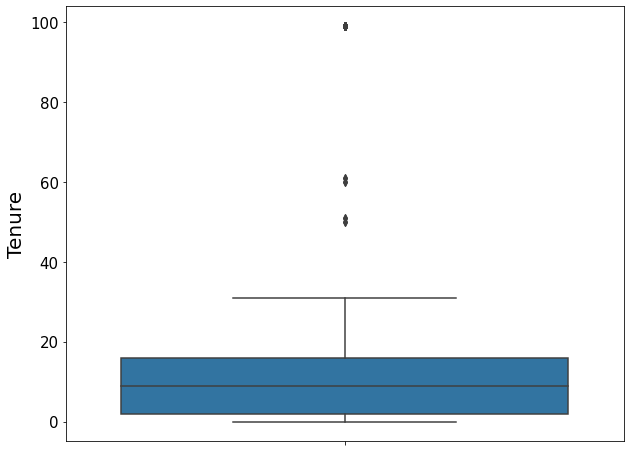

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df2['Tenure']);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('Tenure',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

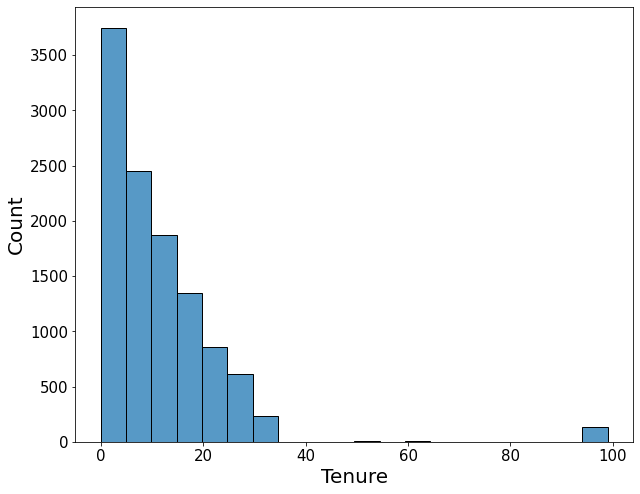

In [37]:
plt.figure(figsize=(10,8))
sns.histplot(df2['Tenure'],bins=20);
plt.xlabel('Tenure',fontsize=20);
plt.ylabel('Count',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

From the above plots we can clearly see the customers tenure is mostly ranging from 0 to 30 months. The distribution is skewed towsrds right indicating most of the customers are new i.e 75% customers with tenure less than 20 months. However a few customers have tenure 99 months. This can be indicative of a segment of very loyal customer associated with the firm from a last 9 year. 
The firm seems to have no active customers from tenure range 32-98, except a group of 8 customers with tenure range 50-60. This indicates the firm was inactive/ out of business or performed very poorly on retaining customer during this time period. 

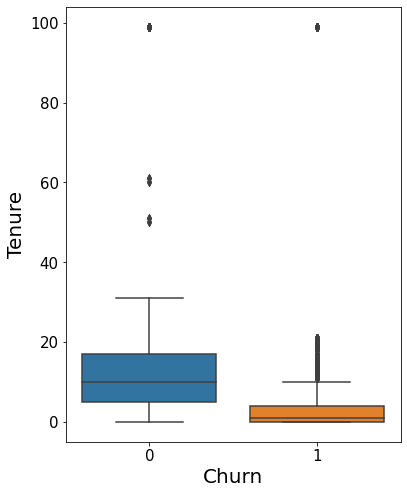

In [38]:
plt.figure(figsize=(6,8))
sns.boxplot(y='Tenure',x='Churn',data=df2);
plt.xlabel('Churn',fontsize=20);
plt.ylabel('Tenure',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

In [39]:
print(df2.groupby('Churn')['Tenure'].quantile(0.25))
print(df2.groupby('Churn')['Tenure'].quantile(0.5))
print(df2.groupby('Churn')['Tenure'].quantile(0.75))

Churn
0    5.0
1    0.0
Name: Tenure, dtype: float64
Churn
0    10.0
1     1.0
Name: Tenure, dtype: float64
Churn
0    17.0
1     4.0
Name: Tenure, dtype: float64


It is very clear from the boxplot, People who are churning are mostly in the initial stage i.e 
* 25% are leaving in first 5 months
* 50% in first 10 months &
* 75% with in less than 17 months of association
However, presence of some outliers could also be seen indicating some churning taking place even after longer association of the customer with the firm.

### 3. City_Tier

In [40]:
df.City_Tier.dtype

dtype('float64')

In [41]:
df.City_Tier.isna().sum()

112

#### Let's impute these values.

In [42]:
df2.City_Tier.value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

In [43]:
df2.City_Tier.value_counts(normalize=True)

1.0    0.651507
3.0    0.305436
2.0    0.043057
Name: City_Tier, dtype: float64

In [44]:
df2.groupby('Churn')['City_Tier'].value_counts()

Churn  City_Tier
0      1.0          6207
       3.0          2678
       2.0           384
1      1.0          1056
       3.0           727
       2.0            96
Name: City_Tier, dtype: int64

In [45]:
df2.groupby('Churn')['City_Tier'].value_counts(normalize=True)

Churn  City_Tier
0      1.0          0.669652
       3.0          0.288920
       2.0          0.041428
1      1.0          0.562001
       3.0          0.386908
       2.0          0.051091
Name: City_Tier, dtype: float64

In [46]:
df2.City_Tier.mode()

0    1.0
dtype: float64

Most of the customers both churned & Not - churned are from Tier - 1 city, so it is the mode. Let's impute the null values with tier - 1

In [47]:
df2.replace(np.nan, 1.0,inplace=True)

In [48]:
df2.City_Tier.isna().sum()

0

In [49]:
df2.City_Tier.mode()

0    1.0
dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


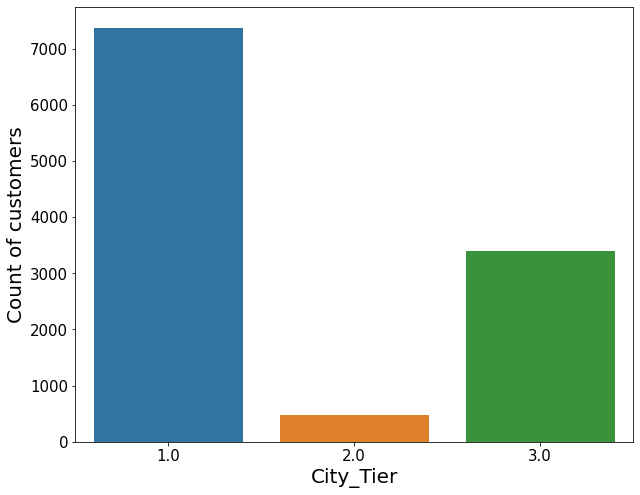

In [50]:
plt.figure(figsize=(10,8))
sns.countplot(df2['City_Tier']);
plt.xlabel('City_Tier',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

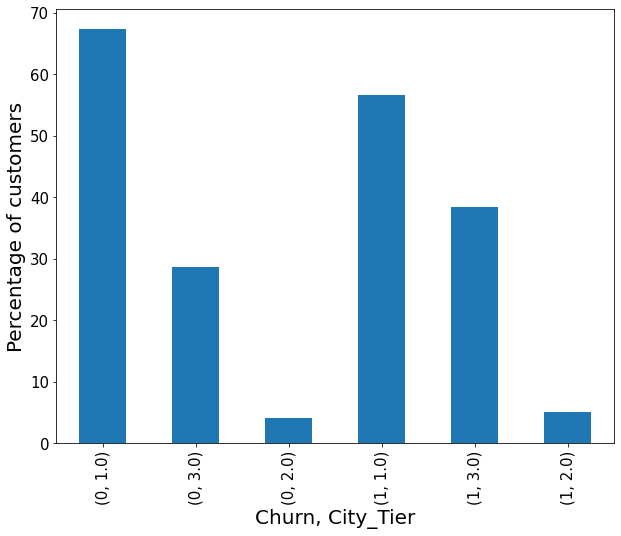

In [51]:
plt.figure(figsize=(10,8))
(df2.groupby('Churn')['City_Tier'].value_counts(normalize=True)*100).plot(kind='bar');
plt.xlabel('Churn, City_Tier',fontsize=20);
plt.ylabel('Percentage of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 4. CC_Contacted_LY

In [52]:
df.CC_Contacted_LY.dtype

dtype('float64')

In [53]:
df.CC_Contacted_LY.isna().sum()

102

In [54]:
df.CC_Contacted_LY.dtype

dtype('float64')

To impute the null values outlier need to be checked.
#### Let's check for presence of any outliers

In [55]:
df2.CC_Contacted_LY.value_counts().sort_index()

1.0      102
4.0        1
5.0        8
6.0      311
7.0      391
8.0      538
9.0      655
10.0     489
11.0     524
12.0     571
13.0     655
14.0     682
15.0     623
16.0     663
17.0     525
18.0     374
19.0     364
20.0     319
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
26.0     169
27.0     174
28.0     178
29.0     181
30.0     175
31.0     165
32.0     192
33.0     155
34.0     178
35.0     165
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
41.0      29
42.0      30
43.0       8
126.0      1
127.0      1
129.0      1
132.0      1
Name: CC_Contacted_LY, dtype: int64

The data says the customer care has been contacted a minimum of 1 to a maximum of 132 times in last 1 year by any account holder. Now let's check the percentiles & boxplot.

In [56]:
print("25% cutstomers have contacted customer care lower than {0: .2f}".format(df2.CC_Contacted_LY.quantile(0.25)),'times')
print("75% cutstomers have contacted customer care higher than {0: .2f}".format(df2.CC_Contacted_LY.quantile(0.75)),'times')

#Q1=df2.CC_Contacted_LY.quantile(0.05)
#Q3=df2.CC_Contacted_LY.quantile(0.75)
print('The Outlier % in CC_Contacted_LY Column:',round(((df2.CC_Contacted_LY < (Q1 - 1.5*IQR)) | (df2.CC_Contacted_LY > (Q3 + 1.5*IQR))).sum()/df2.CC_Contacted_LY.shape[0]* 100,2),'%')

25% cutstomers have contacted customer care lower than  11.00 times
75% cutstomers have contacted customer care higher than  23.00 times
The Outlier % in CC_Contacted_LY Column: 0.63 %


As the outliers are very low in number we can leave them as it is.
#### The NaN values can be replaced with the median value of the column.

In [57]:
df2.CC_Contacted_LY.replace(np.nan,df2.CC_Contacted_LY.median(skipna=True),inplace=True)

In [58]:
df2.CC_Contacted_LY.isna().sum()

0

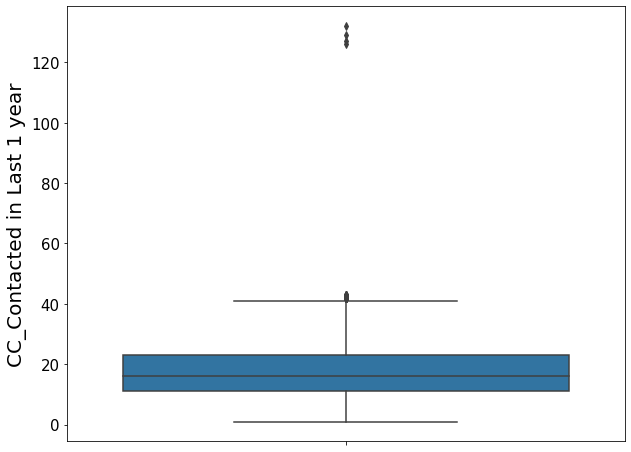

In [59]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df2.CC_Contacted_LY);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('CC_Contacted in Last 1 year',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

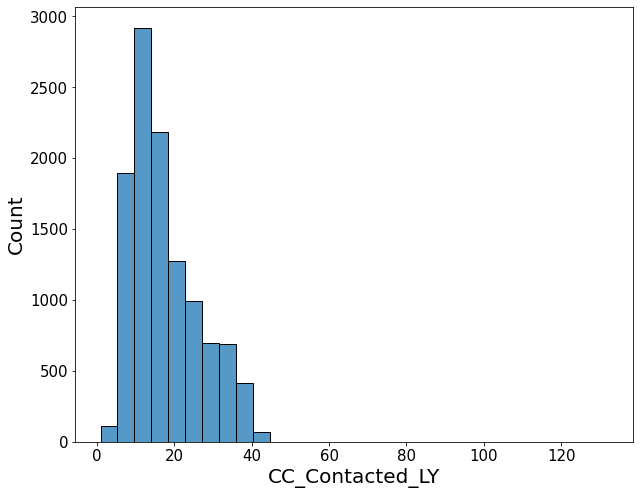

In [60]:
plt.figure(figsize=(10,8))
sns.histplot(df2.CC_Contacted_LY,bins=30);
plt.xlabel('CC_Contacted_LY',fontsize=20);
plt.ylabel('Count',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

From the above plots we can see the customer care is contacted by the customers from once to 43 times last year. However few exceptions where the customers have contacted more than 100 times in a year.
25% customer contact the customer care on an average of once a month & 75% customer contact twice a month.

In [61]:
print(df2.groupby('Churn')['CC_Contacted_LY'].quantile(0.25))
print(df2.groupby('Churn')['CC_Contacted_LY'].quantile(0.5))

Churn
0    11.0
1    12.0
Name: CC_Contacted_LY, dtype: float64
Churn
0    15.0
1    17.0
Name: CC_Contacted_LY, dtype: float64


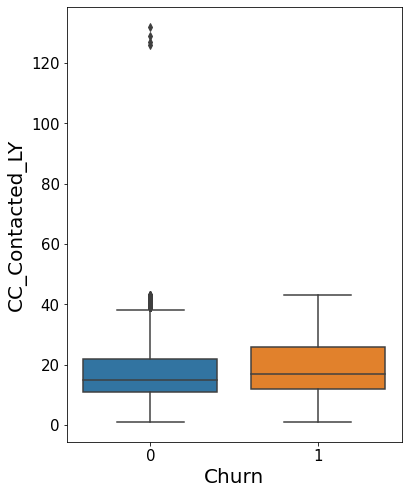

In [62]:
plt.figure(figsize=(6,8))
sns.boxplot(y='CC_Contacted_LY',x='Churn',data=df2);
plt.xlabel('Churn',fontsize=20);
plt.ylabel('CC_Contacted_LY',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 5. Payment 

In [63]:
df2.Payment.dtype

dtype('O')

In [64]:
df2.Payment.isna().sum()

0

In [65]:
df2.Payment.dtype

dtype('O')

In [66]:
df2.groupby('Churn')['Payment'].value_counts()

Churn  Payment         
0      Debit Card          3885
       Credit Card         3012
       E wallet             941
       Cash on Delivery     760
       UPI                  679
       1.0                   87
1      Debit Card           702
       Credit Card          499
       E wallet             276
       Cash on Delivery     254
       UPI                  143
       1.0                   22
Name: Payment, dtype: int64

Most of the customers both churned & Non-Churned are making payment through Debit Cards, so let's replace the Null values with Debit card.

In [67]:
df2.Payment.replace(np.nan,'Debit Card',inplace=True)
#df2.Payment.replace('df2.Payment.mode()','Debit Card',inplace=True)

In [68]:
df2.Payment.mode()

0    Debit Card
dtype: object

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


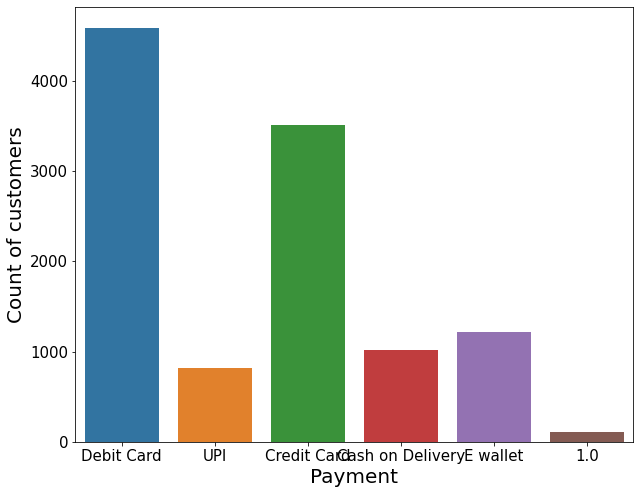

In [69]:
plt.figure(figsize=(10,8))
sns.countplot(df2['Payment']);
plt.xlabel('Payment',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

<AxesSubplot:xlabel='Churn,Payment'>

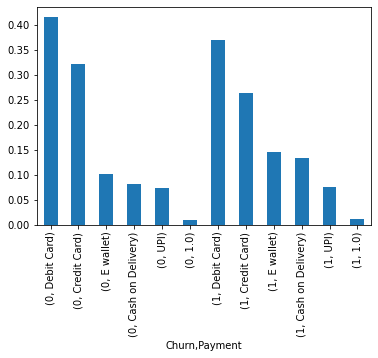

In [70]:
df2.groupby('Churn')['Payment'].value_counts(normalize=True).plot(kind='bar')

In [71]:
df2.groupby('Churn')['Payment'].value_counts(normalize=True)* 100

Churn  Payment         
0      Debit Card          41.488680
       Credit Card         32.165741
       E wallet            10.049124
       Cash on Delivery     8.116190
       UPI                  7.251175
       1.0                  0.929090
1      Debit Card          37.025316
       Credit Card         26.318565
       E wallet            14.556962
       Cash on Delivery    13.396624
       UPI                  7.542194
       1.0                  1.160338
Name: Payment, dtype: float64

<AxesSubplot:xlabel='Payment,Churn'>

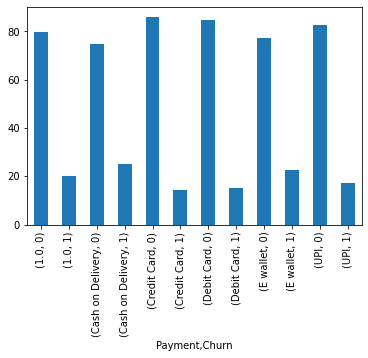

In [72]:
(df2.groupby('Payment')['Churn'].value_counts(normalize=True)* 100).plot(kind='bar')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


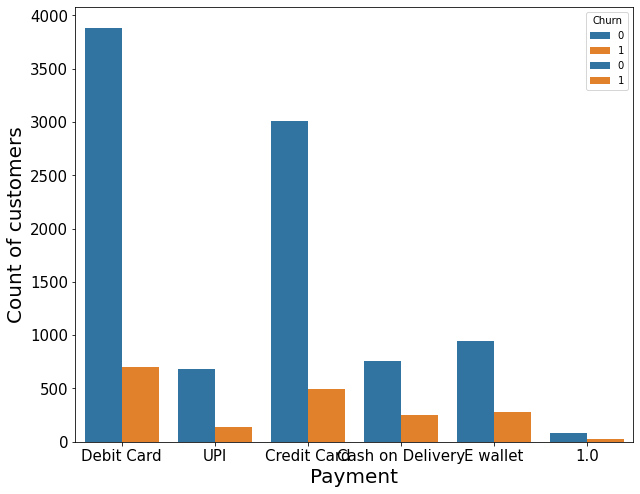

In [73]:
plt.figure(figsize=(10,8))
sns.countplot(df2['Payment'],hue=df2['Churn']);
sns.countplot(df2['Payment'],hue=df2['Churn']);
plt.xlabel('Payment',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();


In [74]:
# Stacked bar plot

### 6. Gender  

In [75]:
df2.Gender.dtype

dtype('O')

In [76]:
df.Gender.isna().sum()

108

In [77]:
df.Gender.value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [78]:
## Replacing the male & M and Female & F
df2.replace(to_replace='M',value='Male',inplace=True)
df2.replace(to_replace='F',value='Female',inplace=True)

In [79]:
df2.Gender.value_counts()

Male      6704
Female    4448
1.0        108
Name: Gender, dtype: int64

In [80]:
df2.Gender.isna().sum()

0

In [81]:
df2.groupby('Churn')['Gender'].value_counts(normalize=True)

Churn  Gender
0      Male      0.589385
       Female    0.401431
       1.0       0.009184
1      Male      0.625000
       Female    0.363397
       1.0       0.011603
Name: Gender, dtype: float64

In [82]:
## Replacing these Null values with mode of Gender column which is Male
df2.Gender.replace(to_replace=np.nan,value='Male',inplace=True)

In [83]:
df2.Gender.isna().sum()

0

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


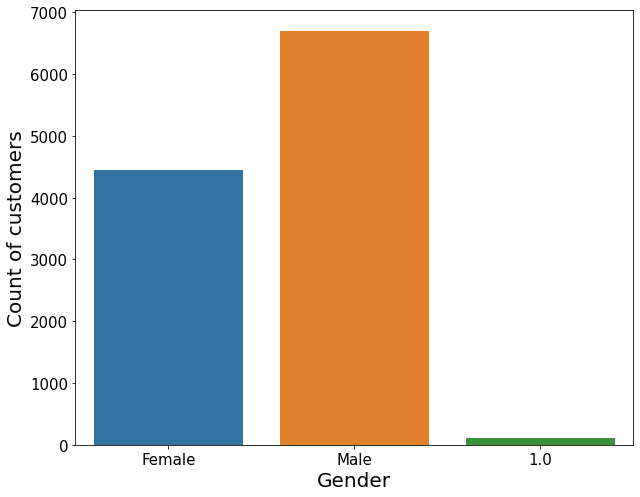

In [84]:
plt.figure(figsize=(10,8))
sns.countplot(df2.Gender);
plt.xlabel('Gender',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

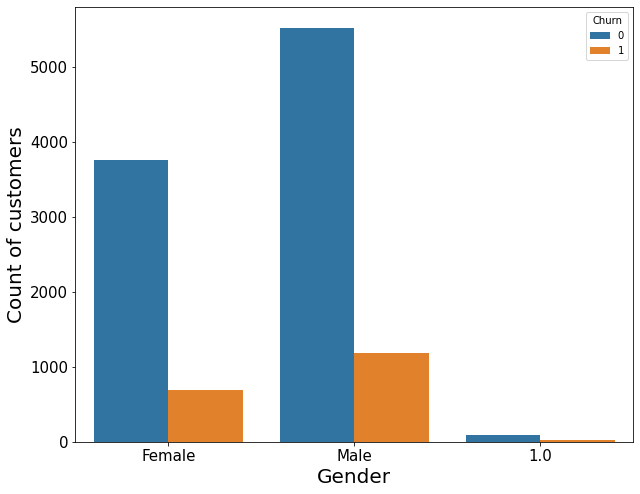

In [85]:
plt.figure(figsize=(10,8))
sns.countplot(x='Gender',hue='Churn',data=df2);
plt.xlabel('Gender',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 7.  Service_Score

In [86]:
df2.Service_Score.dtype

dtype('float64')

In [87]:
df.Service_Score.isna().sum()

98

In [88]:
df.Service_Score.value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

In [89]:
df2.groupby('Churn')['Service_Score'].value_counts()

Churn  Service_Score
0      3.0              4554
       2.0              2701
       4.0              1937
       1.0               159
       0.0                 8
       5.0                 5
1      3.0               936
       2.0               550
       4.0               394
       1.0                16
Name: Service_Score, dtype: int64

One interesting fact could be observed here, customers who churned never rated the service as 0 or 1 or 5. Ratings given were average. 
Let's replace the nans of both the categories separately with their group mean i.e replacing the Nan values of churned customer with mean ratings given by only churned people and same for not churned customers.  

In [90]:
df2.groupby('Churn')['Service_Score'].count()

Churn
0    9364
1    1896
Name: Service_Score, dtype: int64

In [91]:
df2.Service_Score.mode()

0    3.0
dtype: float64

In [92]:
round(df2.groupby('Churn')['Service_Score'].mean(),0)

Churn
0    3.0
1    3.0
Name: Service_Score, dtype: float64

In [93]:
df2.Service_Score.replace(np.nan,round(df2.Service_Score.mean(),0),inplace=True)

In [94]:
df2.Service_Score.isna().sum()

0

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


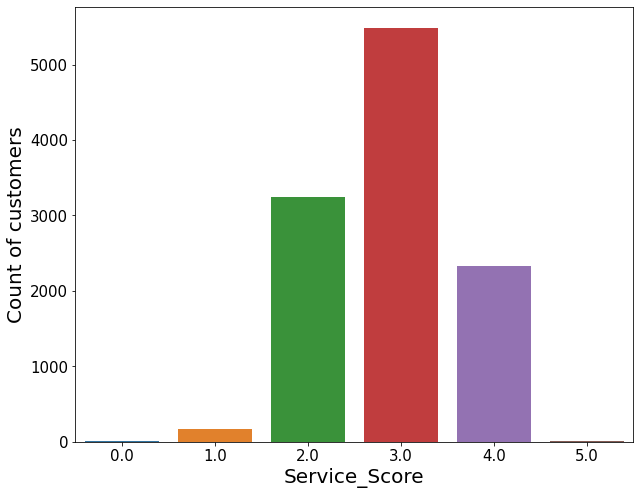

In [95]:
plt.figure(figsize=(10,8))
sns.countplot(df2.Service_Score);
plt.xlabel('Service_Score',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


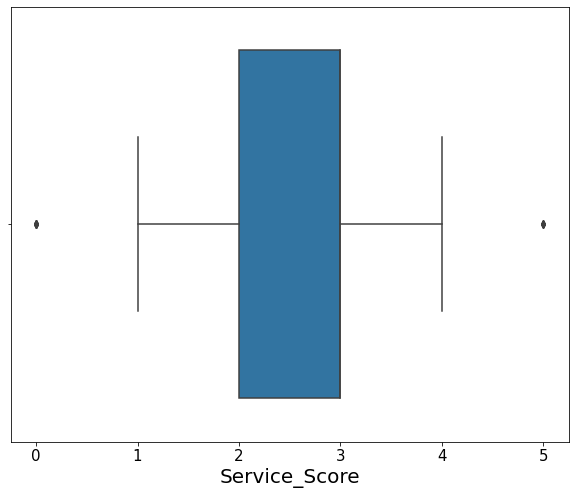

In [96]:
plt.figure(figsize=(10,8))
sns.boxplot(df2.Service_Score);
plt.xlabel('Service_Score',fontsize=20);
#plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

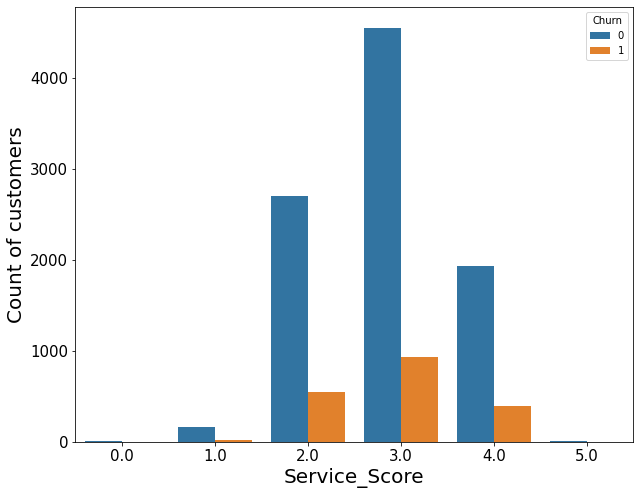

In [97]:
plt.figure(figsize=(10,8))
sns.countplot(x='Service_Score',hue='Churn',data=df2);
plt.xlabel('Service_Score',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 8.  Account_user_count

In [98]:
df2.Account_user_count.dtype

dtype('float64')

In [99]:
df2.Account_user_count.isna().sum()

0

In [100]:
df2.Account_user_count.isna().sum()/df2.Account_user_count.count()*100

0.0

In [101]:
df2.Account_user_count.value_counts()

4.0    4569
3.0    3261
5.0    1699
1.0     890
2.0     526
6.0     315
Name: Account_user_count, dtype: int64

In [102]:
round(df2.Account_user_count.mean(),0)

4.0

In [103]:
df2.Account_user_count.median()

4.0

Each account is further associated with 1 to 6 users. Maximum accounts have 4 users follwed by 3. The mean & median values also are 4. So, imputing the Nan values with 4.0

In [104]:
df2.Account_user_count.replace(np.nan,4.0,inplace=True)

In [105]:
df2.Account_user_count.isna().sum()

0

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


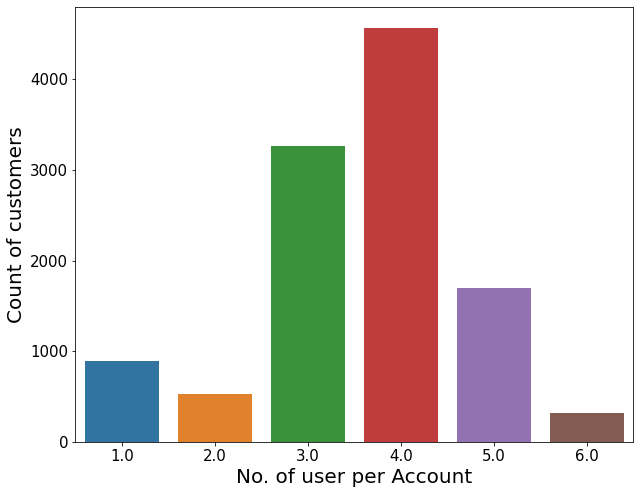

In [106]:
plt.figure(figsize=(10,8))
sns.countplot(df2.Account_user_count);
plt.xlabel('No. of user per Account',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

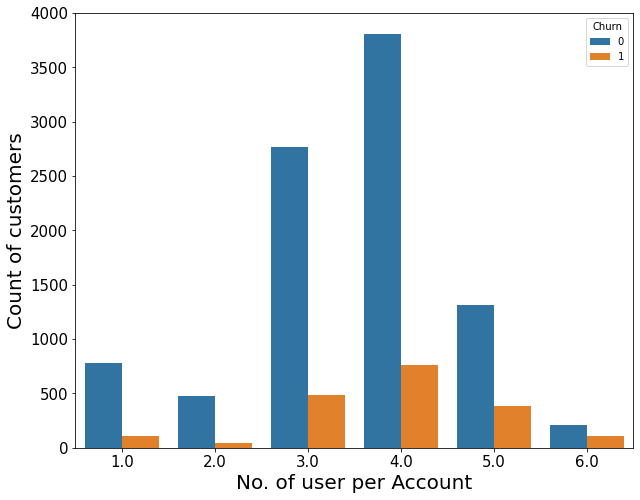

In [107]:
plt.figure(figsize=(10,8))
sns.countplot(x='Account_user_count',hue='Churn',data=df2);
plt.xlabel('No. of user per Account',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

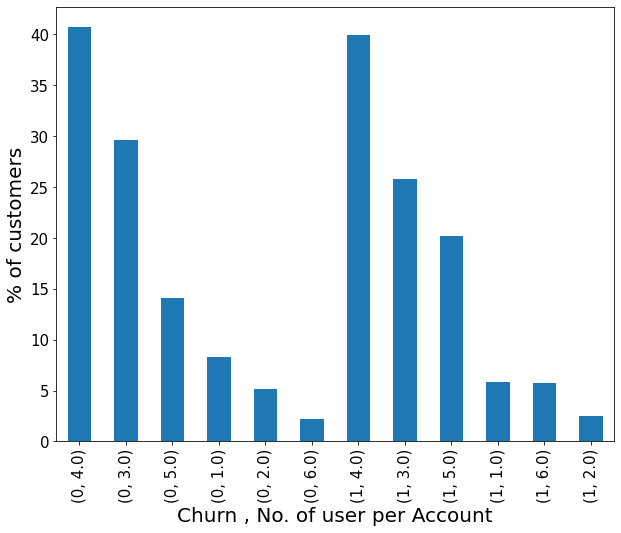

In [108]:
plt.figure(figsize=(10,8))
(df2.groupby('Churn')['Account_user_count'].value_counts(normalize=True)* 100).plot(kind='bar')
plt.xlabel('Churn , No. of user per Account',fontsize=20);
plt.ylabel('% of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 9.  account_segment 

In [109]:
df2.account_segment.dtype

dtype('O')

In [110]:
#df2.account_segment = df.account_segment

In [111]:
df2.account_segment.isna().sum()

0

In [112]:
df.account_segment.value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

Some redundancy can be seen in the data and this need to be fixed before imputing the Nan values

In [113]:
df2.account_segment.replace('Regular +','Regular Plus',inplace=True)
df2.account_segment.replace('Super +','Super Plus',inplace=True)

In [114]:
df2.account_segment.value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
1.0               97
Name: account_segment, dtype: int64

In [115]:
round(df2.groupby('Churn').account_segment.value_counts(normalize=True)*100,2)

Churn  account_segment
0      Super              38.94
       Regular Plus       32.01
       HNI                14.78
       Super Plus          8.31
       Regular             5.13
       1.0                 0.84
1      Regular Plus       59.44
       Super              21.94
       HNI                13.45
       Regular             2.11
       Super Plus          2.11
       1.0                 0.95
Name: account_segment, dtype: float64

For this column, simply replacing the Nan with mode might not work since the account segment selected by churned & not-churned customers are not in sync. The cutomers who churned were mostly i.e 60% selected 'Regular Plus' & 22% selected 'Super'. However 39% people who didn't churn seem to have selected 'Super' & 32% selected 'Regular Plus'. 

#### So, replacing the Nan's for churned people with mode of the churned group and mode of non-churned for non-churned group.

In [116]:
df2.loc[(df2['Churn'] == 0) & (df2['account_segment'].isnull()),'account_segment'] = 'Regular Plus'
df2.loc[(df2['Churn'] == 1) & (df2['account_segment'].isnull()),'account_segment'] = 'Super'

In [117]:
df2.account_segment.value_counts(normalize=True)

Regular Plus    0.366252
Super           0.360746
HNI             0.145560
Super Plus      0.072647
Regular         0.046181
1.0             0.008615
Name: account_segment, dtype: float64

In [118]:
(4203-4124)+ (4080-4062)

97

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


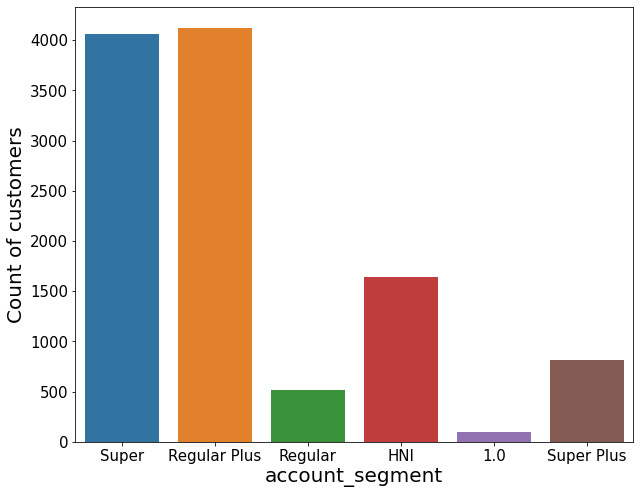

In [119]:
plt.figure(figsize=(10,8))
sns.countplot(df2.account_segment);
plt.xlabel('account_segment',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

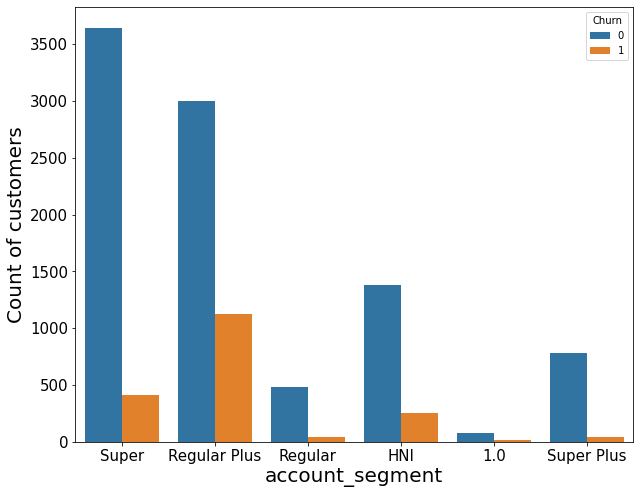

In [120]:
plt.figure(figsize=(10,8))
sns.countplot(x='account_segment',hue='Churn',data=df2);
plt.xlabel('account_segment',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

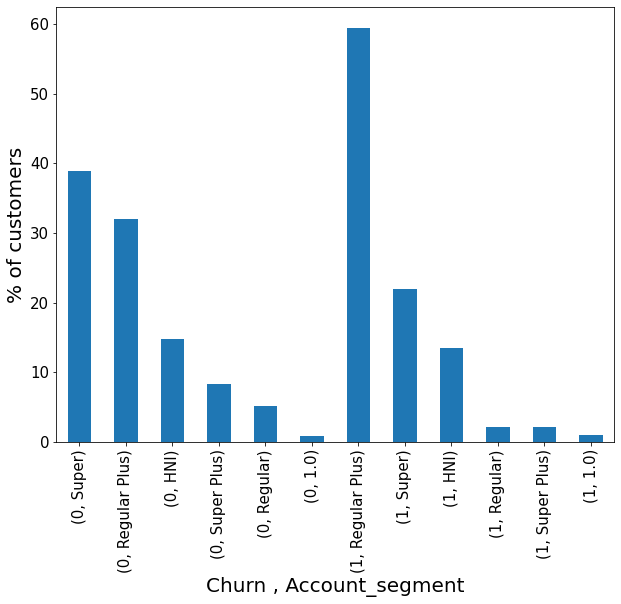

In [121]:
plt.figure(figsize=(10,8))
(df2.groupby('Churn')['account_segment'].value_counts(normalize=True)* 100).plot(kind='bar')
plt.xlabel('Churn , Account_segment',fontsize=20);
plt.ylabel('% of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 10.  CC_Agent_Score

In [122]:
df2.CC_Agent_Score.dtype

dtype('float64')

In [123]:
df2.CC_Agent_Score.isna().sum()

0

In [124]:
df2.CC_Agent_Score.value_counts(normalize=True)

3.0    0.298401
1.0    0.214742
5.0    0.194583
4.0    0.188899
2.0    0.103375
Name: CC_Agent_Score, dtype: float64

In [125]:
round(df2.groupby('Churn').CC_Agent_Score.value_counts(normalize=True)*100,2)


Churn  CC_Agent_Score
0      3.0               29.72
       1.0               22.77
       4.0               18.83
       5.0               17.82
       2.0               10.86
1      3.0               30.43
       5.0               27.53
       4.0               19.20
       1.0               15.08
       2.0                7.75
Name: CC_Agent_Score, dtype: float64

In [126]:
df2.CC_Agent_Score.replace(np.nan,3.0,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


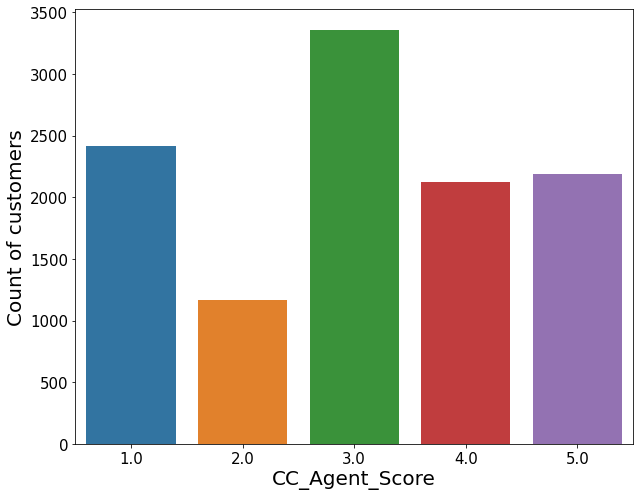

In [127]:
plt.figure(figsize=(10,8))
sns.countplot(df2.CC_Agent_Score);
plt.xlabel('CC_Agent_Score',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

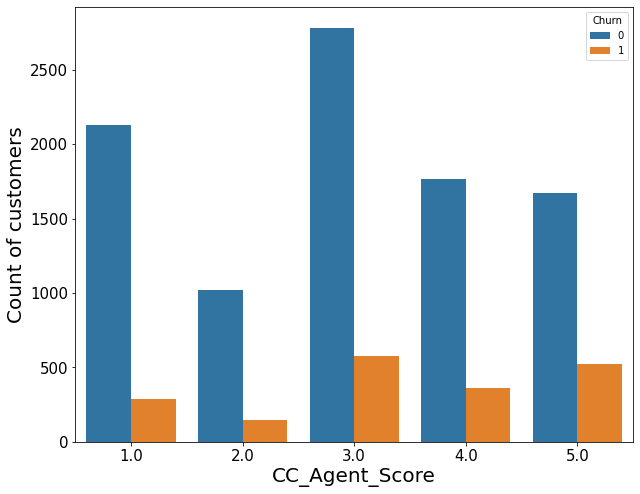

In [128]:
plt.figure(figsize=(10,8))
sns.countplot(x='CC_Agent_Score',hue='Churn',data=df2);
plt.xlabel('CC_Agent_Score',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

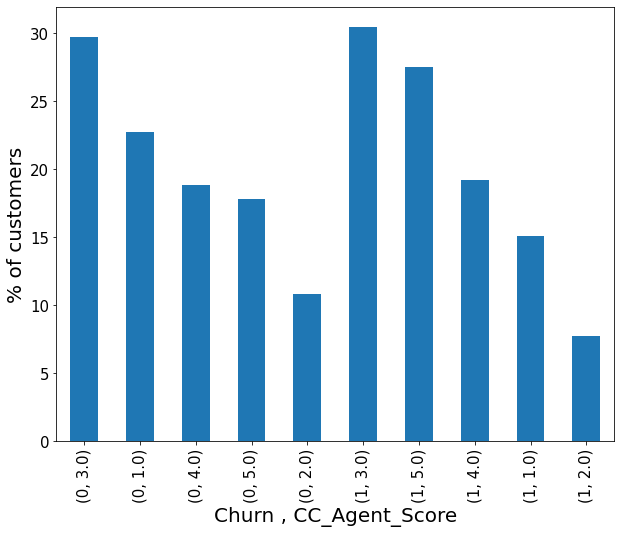

In [135]:
plt.figure(figsize=(10,8))
(df2.groupby('Churn')['CC_Agent_Score'].value_counts(normalize=True)* 100).plot(kind='bar')
plt.xlabel('Churn , CC_Agent_Score',fontsize=20);
plt.ylabel('% of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 11. Marital_Status

In [136]:
df2.Marital_Status.dtype

dtype('O')

In [137]:
df2.Marital_Status.isna().sum()

0

In [138]:
df2.Marital_Status.value_counts()

Married     5860
Single      3520
Divorced    1668
1.0          212
Name: Marital_Status, dtype: int64

In [139]:
round(df2.groupby('Churn').Marital_Status.value_counts(normalize=True)*100,2)


Churn  Marital_Status
0      Married           55.39
       Single            27.48
       Divorced          15.21
       1.0                1.92
1      Single            49.95
       Married           35.50
       Divorced          12.87
       1.0                1.69
Name: Marital_Status, dtype: float64

In [140]:
## Replacing Nan by mode of respective group.
df2.loc[(df2['Churn'] == 0) & (df2['Marital_Status'].isnull()),'Marital_Status'] = 'Married'
df2.loc[(df2['Churn'] == 1) & (df2['Marital_Status'].isnull()),'Marital_Status'] = 'Single'


In [141]:
# Checking the value counts after imputation
round(df2.groupby('Churn').Marital_Status.value_counts(normalize=True)*100,2)

Churn  Marital_Status
0      Married           55.39
       Single            27.48
       Divorced          15.21
       1.0                1.92
1      Single            49.95
       Married           35.50
       Divorced          12.87
       1.0                1.69
Name: Marital_Status, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


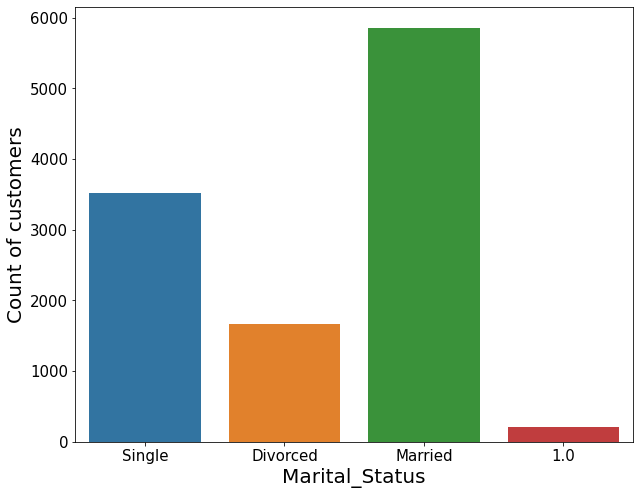

In [142]:
plt.figure(figsize=(10,8))
sns.countplot(df2.Marital_Status);
plt.xlabel('Marital_Status',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

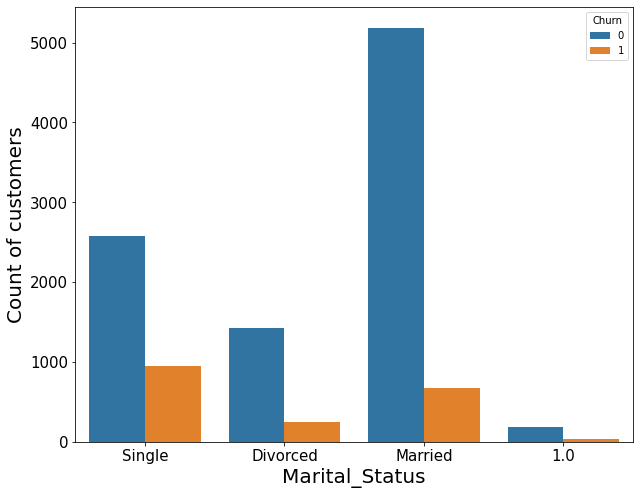

In [143]:
plt.figure(figsize=(10,8))
sns.countplot(x='Marital_Status',hue='Churn',data=df2);
plt.xlabel('Marital_Status',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

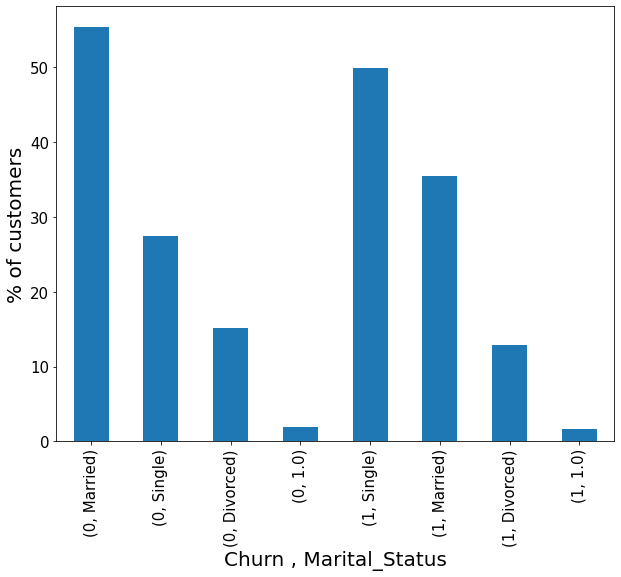

In [144]:
plt.figure(figsize=(10,8))
(df2.groupby('Churn')['Marital_Status'].value_counts(normalize=True)* 100).plot(kind='bar')
plt.xlabel('Churn , Marital_Status',fontsize=20);
plt.ylabel('% of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 12. rev_per_month

In [145]:
df2.rev_per_month.dtype

dtype('float64')

In [146]:
df2.rev_per_month.isna().sum()

0

In [147]:
# Now let's check for outliers if any in this column, so as to decide on the imputation method.

In [148]:
print("For 25% customers the revenue per month is {0: .2f}".format(df2.rev_per_month.quantile(0.25)))
print("For 75% customers the revenue per month is {0: .2f}".format(df2.rev_per_month.quantile(0.75)))

Q1=df2.rev_per_month.quantile(0.25)
Q3=df2.rev_per_month.quantile(0.75)
print('The Outlier % in rev_per_month Column:',round(((df2.rev_per_month < (Q1 - 1.5*IQR)) | (df2.rev_per_month > (Q3 + 1.5*IQR))).sum()/df2.rev_per_month.shape[0]* 100,2),'%')

For 25% customers the revenue per month is  3.00
For 75% customers the revenue per month is  7.00
The Outlier % in rev_per_month Column: 0.93 %


In [149]:
df2.rev_per_month.replace(np.nan,df2.rev_per_month.median(skipna=True),inplace=True)

In [150]:
df2.rev_per_month.median(skipna=True)

4.0

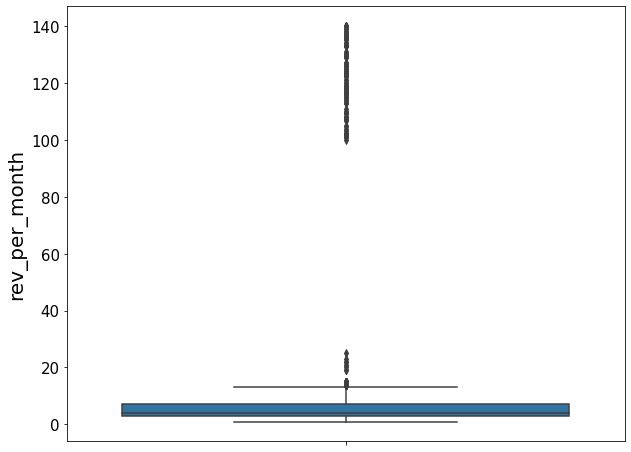

In [151]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df2['rev_per_month']);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('rev_per_month',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

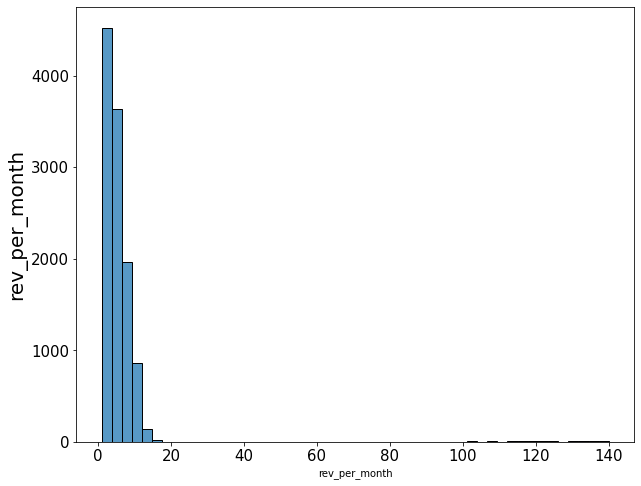

In [152]:
plt.figure(figsize=(10,8))
sns.histplot(df2['rev_per_month'],bins=50);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('rev_per_month',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

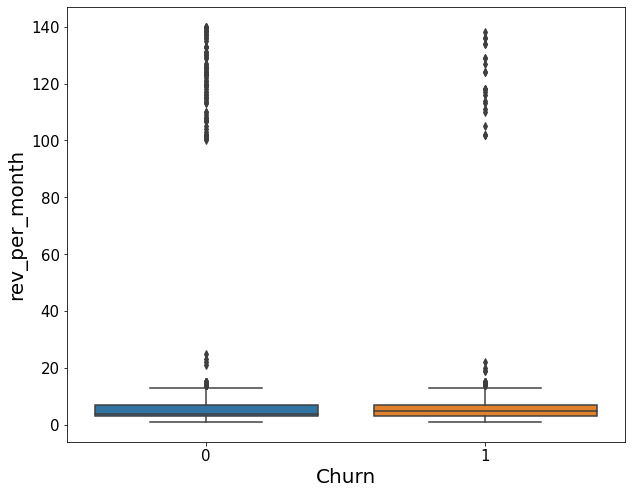

In [153]:
plt.figure(figsize=(10,8))
sns.boxplot(y='rev_per_month',x='Churn', data=df2);
plt.xlabel('Churn',fontsize=20);
plt.ylabel('rev_per_month',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 13. Complain_ly

In [154]:
df2.Complain_ly.dtype

dtype('float64')

In [155]:
df2.Complain_ly.isnull().sum()

0

In [156]:
df2.Complain_ly.mean(skipna=True)

0.3079928952042629

In [157]:
df2.Complain_ly.median(skipna=True)

0.0

In [158]:
df2.Complain_ly.value_counts(normalize=True)

0.0    0.692007
1.0    0.307993
Name: Complain_ly, dtype: float64

In [159]:
round(df2.groupby('Churn').Complain_ly.value_counts(normalize=True)*100,2)


Churn  Complain_ly
0      0.0            74.13
       1.0            25.87
1      1.0            55.17
       0.0            44.83
Name: Complain_ly, dtype: float64

In [160]:
## Replacing Nan by mode of respective group.
df2.loc[(df2['Churn'] == 0) & (df2['Complain_ly'].isnull()),'Complain_ly'] = 0
df2.loc[(df2['Churn'] == 1) & (df2['Complain_ly'].isnull()),'Complain_ly'] = 1


In [161]:
df2.Complain_ly.value_counts(normalize=True)

0.0    0.692007
1.0    0.307993
Name: Complain_ly, dtype: float64

In [162]:
df2.Complain_ly.isnull().sum()

0

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


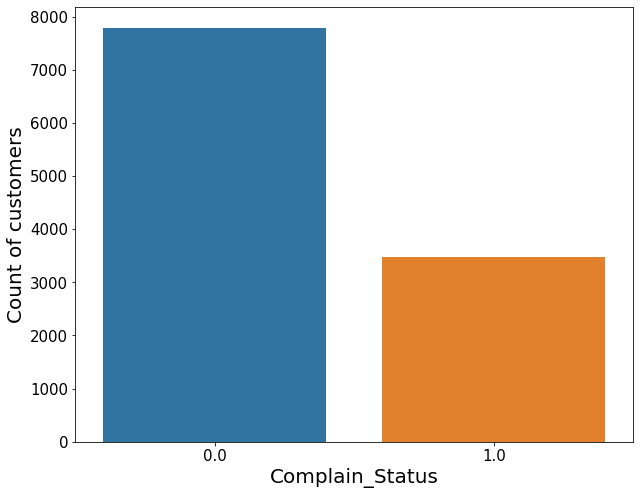

In [163]:
plt.figure(figsize=(10,8))
sns.countplot(df2.Complain_ly);
plt.xlabel('Complain_Status',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


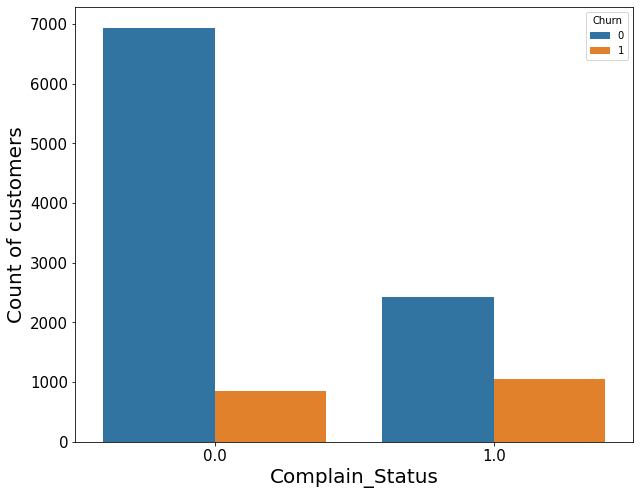

In [164]:
plt.figure(figsize=(10,8))
sns.countplot(df2.Complain_ly,hue=df2.Churn);
plt.xlabel('Complain_Status',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

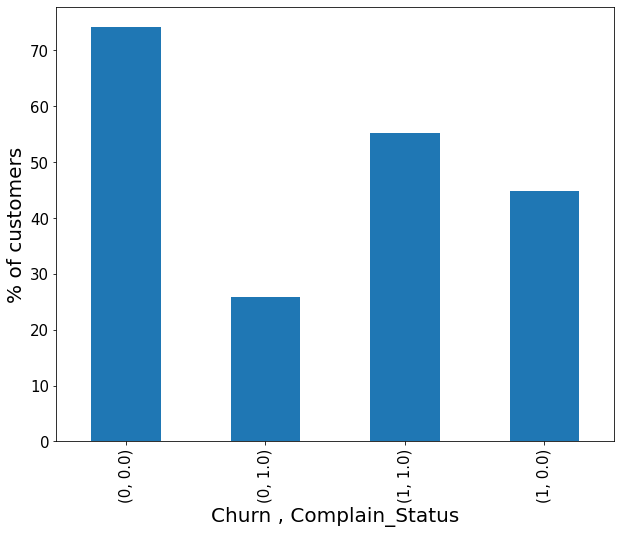

In [165]:
plt.figure(figsize=(10,8))
(df2.groupby('Churn')['Complain_ly'].value_counts(normalize=True)* 100).plot(kind='bar')
plt.xlabel('Churn , Complain_Status',fontsize=20);
plt.ylabel('% of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 14. rev_growth_yoy

In [166]:
df2.rev_growth_yoy.dtype

dtype('float64')

In [167]:
df2.rev_growth_yoy.isna().sum()

0

In [168]:
df2.rev_growth_yoy.mean(skipna=True)

16.189342806394315

In [169]:
df2.rev_growth_yoy.median(skipna=True)

15.0

In [170]:
print("For 25% customers the revenue growth per year is {0: .2f}".format(df2.rev_growth_yoy.quantile(0.25)))
print("For 75% customers the revenue growth per year is {0: .2f}".format(df2.rev_growth_yoy.quantile(0.75)))

Q1=df2.rev_growth_yoy.quantile(0.25)
Q3=df2.rev_growth_yoy.quantile(0.75)
print('The Outlier % in rev_per_month Column:',round(((df2.rev_growth_yoy < (Q1 - 1.5*IQR)) | (df2.rev_growth_yoy > (Q3 + 1.5*IQR))).sum()/df2.rev_growth_yoy.shape[0]* 100,2),'%')

For 25% customers the revenue growth per year is  13.00
For 75% customers the revenue growth per year is  19.00
The Outlier % in rev_per_month Column: 0.0 %


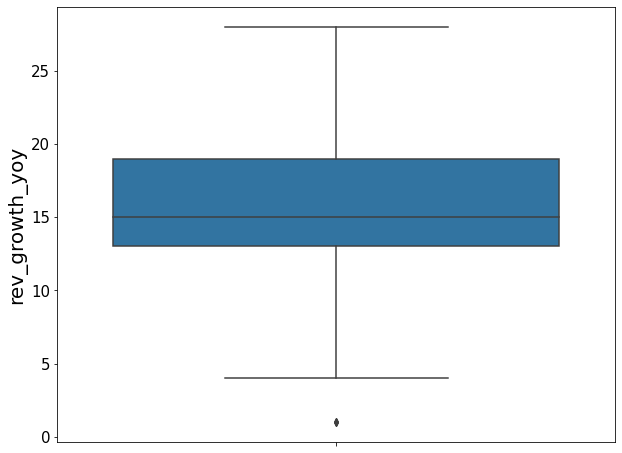

In [171]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df2['rev_growth_yoy']);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('rev_growth_yoy',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

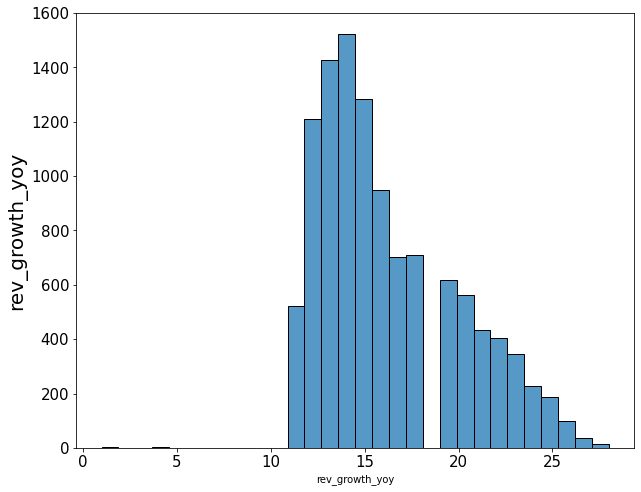

In [172]:
plt.figure(figsize=(10,8))
sns.histplot(df2['rev_growth_yoy'],bins=30);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('rev_growth_yoy',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

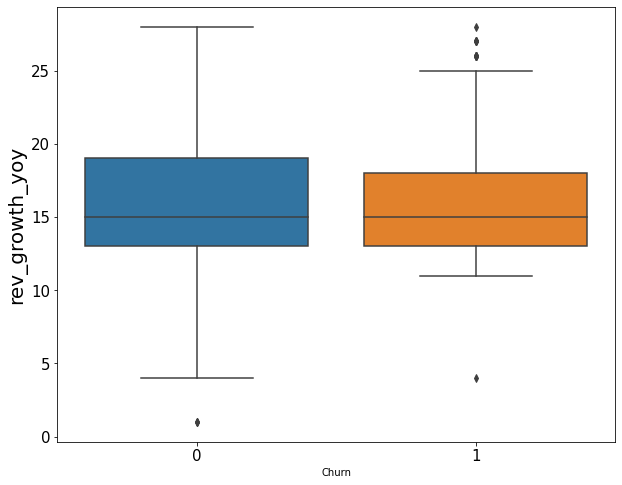

In [173]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df2['rev_growth_yoy'], x=df2['Churn']);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('rev_growth_yoy',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 15. coupon_used_for_payment

In [174]:
df.coupon_used_for_payment.dtype

dtype('O')

In [175]:
df2.coupon_used_for_payment.isna().sum()

0

In [176]:
df2.coupon_used_for_payment.value_counts()

1.0     4376
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
9.0       34
10.0      34
11.0      30
12.0      26
13.0      22
14.0      12
15.0       4
16.0       4
Name: coupon_used_for_payment, dtype: int64

In [177]:
Q1=df2.coupon_used_for_payment.quantile(0.25)
Q3=df2.coupon_used_for_payment.quantile(0.75)
IQR = Q3-Q1
print(Q1, Q3)
print('The Outlier % in coupon_used_for_payment Column:',round(((df2.coupon_used_for_payment < (Q1 - 1.5*IQR)) | (df2.coupon_used_for_payment > (Q3 + 1.5*IQR))).sum()/df2.coupon_used_for_payment.shape[0]* 100,2),'%')

1.0 2.0
The Outlier % in coupon_used_for_payment Column: 12.26 %


In [178]:
 (df2.coupon_used_for_payment > (Q3 + 1.5*IQR)).sum()

1380

In [179]:
df2.coupon_used_for_payment.replace(np.nan,df2.coupon_used_for_payment.median(skipna=True),inplace=True)

In [180]:
df2.coupon_used_for_payment.isna().sum()

0

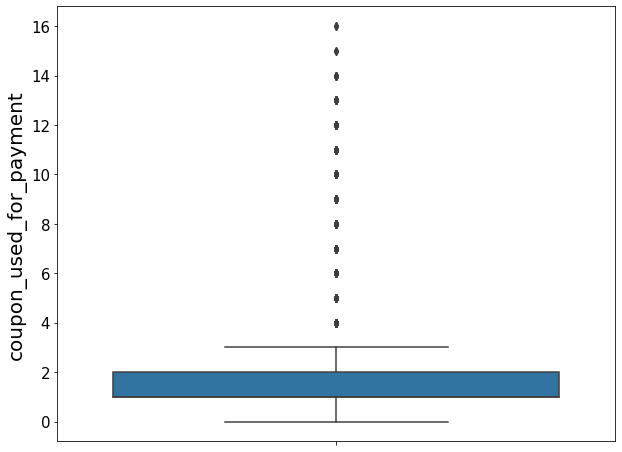

In [181]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df2['coupon_used_for_payment']);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('coupon_used_for_payment',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

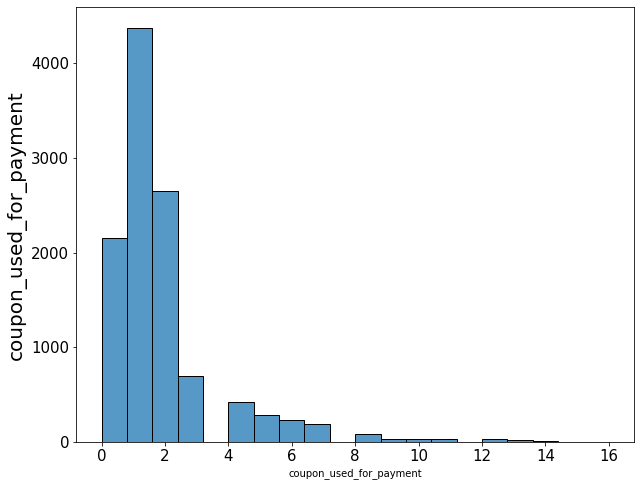

In [182]:
plt.figure(figsize=(10,8))
sns.histplot(df2['coupon_used_for_payment'],bins=20);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('coupon_used_for_payment',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

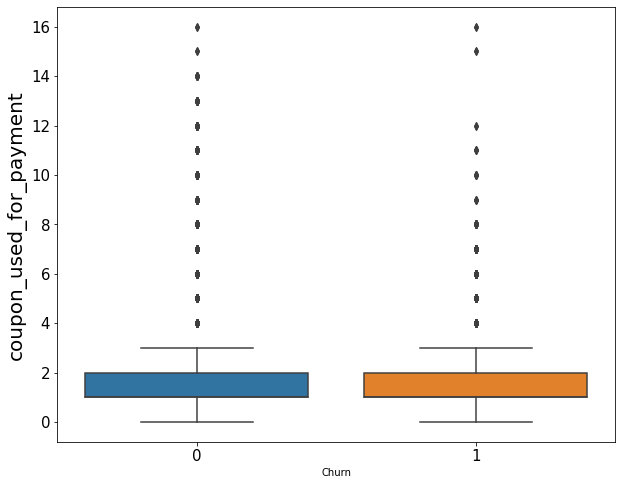

In [183]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df2['coupon_used_for_payment'], x=df2['Churn']);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('coupon_used_for_payment',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 16. Day_Since_CC_connect

In [184]:
df.Day_Since_CC_connect.dtype

dtype('O')

In [185]:
df2.Day_Since_CC_connect.dtype

dtype('float64')

In [186]:
df2.Day_Since_CC_connect.isna().sum()

0

In [187]:
df2.Day_Since_CC_connect.mean()

4.517673179396092

In [188]:
df2.Day_Since_CC_connect.median(skipna=True)

3.0

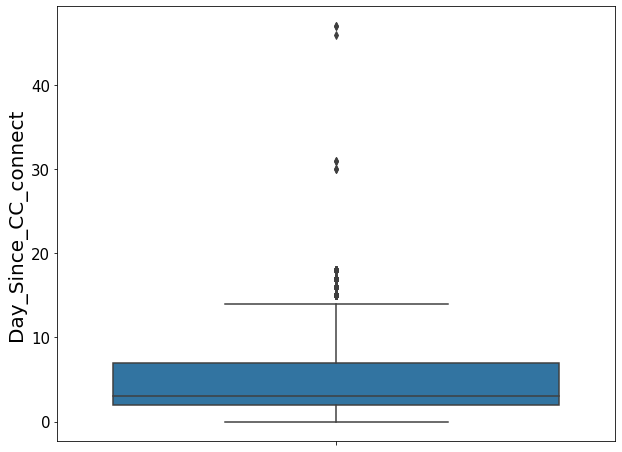

In [189]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df2['Day_Since_CC_connect']);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('Day_Since_CC_connect',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

In [190]:
df2.Day_Since_CC_connect.replace(np.nan,df2.Day_Since_CC_connect.median(skipna=True),inplace=True)


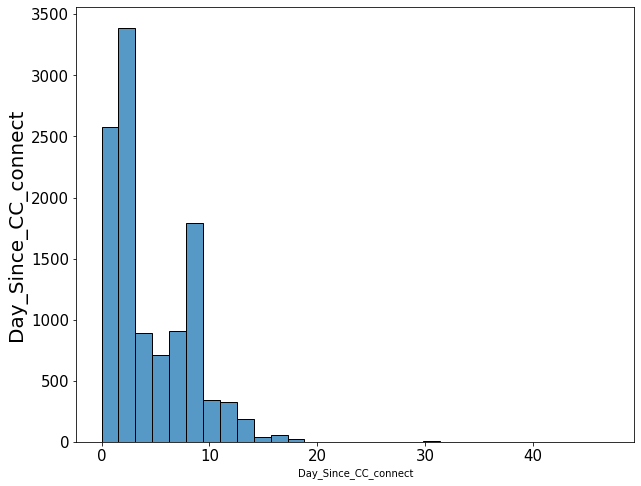

In [191]:
plt.figure(figsize=(10,8))
sns.histplot(df2['Day_Since_CC_connect'],bins=30);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('Day_Since_CC_connect',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

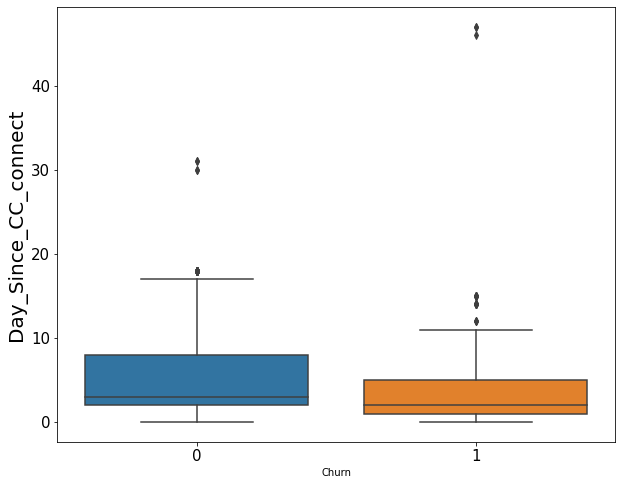

In [192]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df2['Day_Since_CC_connect'],x=df2['Churn']);
#plt.xlabel('Churn',fontsize=20);
plt.ylabel('Day_Since_CC_connect',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### 17. cashback

In [193]:
df2.isna().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [194]:
df2.cashback.dtype

dtype('float64')

### 18. login_device

In [195]:
df.Login_device.value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [196]:
# % of these anomalies
df2.Login_device.value_counts(normalize=True)*100

Mobile      66.447602
Computer    26.802842
&&&&         4.786856
1.0          1.962700
Name: Login_device, dtype: float64

Around 5% values are anomalies. let's not drop these rather impute these with the mode. 

In [197]:
round(df2.groupby('Churn').Login_device.value_counts(normalize=True)*100,2)


Churn  Login_device
0      Mobile          67.39
       Computer        25.85
       &&&&             4.85
       1.0              1.91
1      Mobile          61.81
       Computer        31.49
       &&&&             4.48
       1.0              2.22
Name: Login_device, dtype: float64

In [198]:
df2.Login_device.replace('&&&&','Mobile',inplace=True)


In [199]:
df2.Login_device.value_counts()

Mobile      8021
Computer    3018
1.0          221
Name: Login_device, dtype: int64

In [200]:
df2.Login_device.value_counts(normalize=True)

Mobile      0.712345
Computer    0.268028
1.0         0.019627
Name: Login_device, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


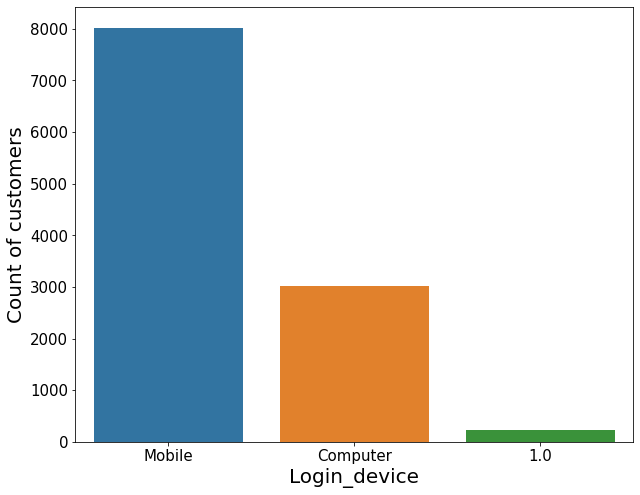

In [201]:
plt.figure(figsize=(10,8))
sns.countplot(df2.Login_device);
plt.xlabel('Login_device',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


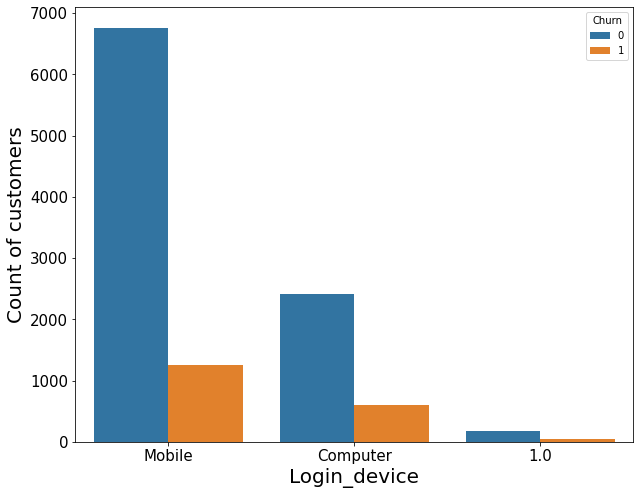

In [202]:
plt.figure(figsize=(10,8))
sns.countplot(df2.Login_device, hue=df2['Churn']);
plt.xlabel('Login_device',fontsize=20);
plt.ylabel('Count of customers',fontsize=20);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

## Mulitivariate Analysis

In [203]:
corr=df2.drop(['Churn', 'Complain_ly'],axis=1).corr()
#sns.heatmap(df2.corr())

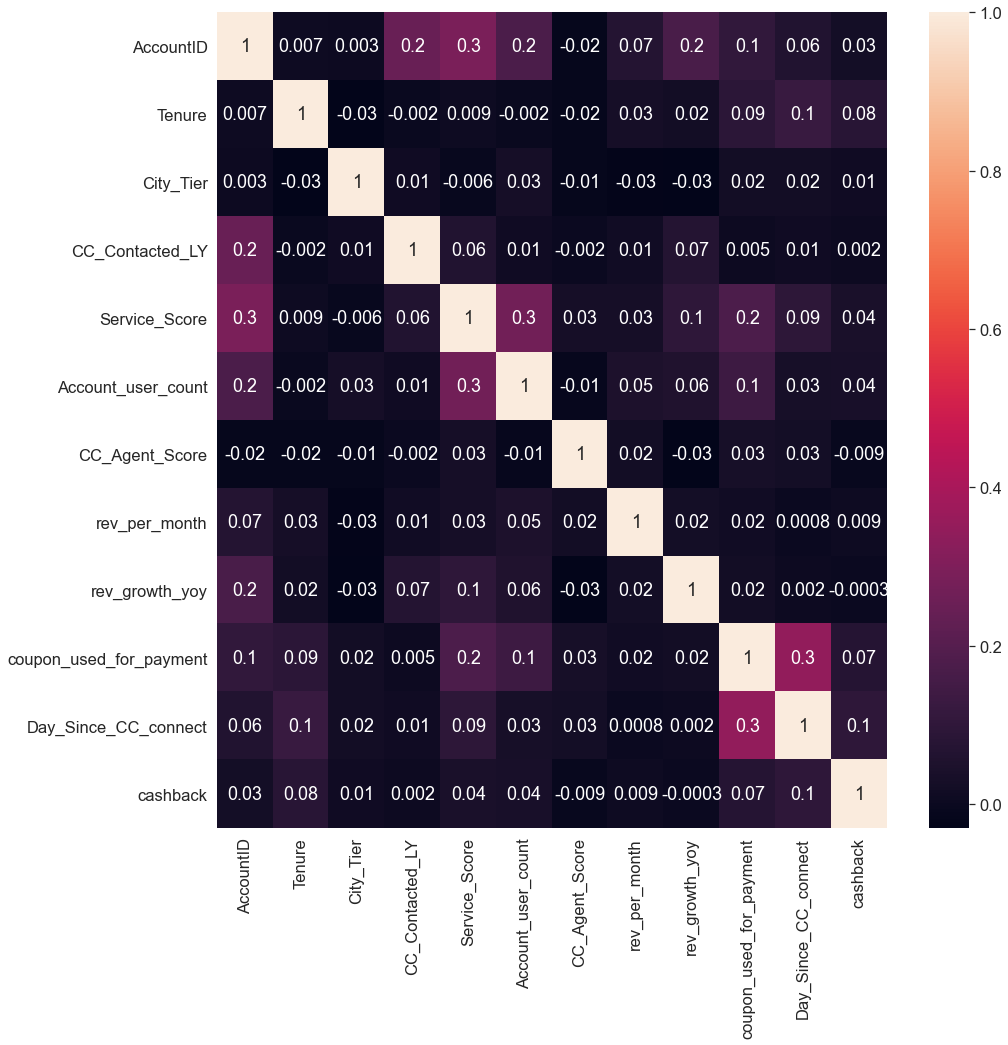

In [204]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
sns.heatmap(corr,annot=True,fmt='.1g');

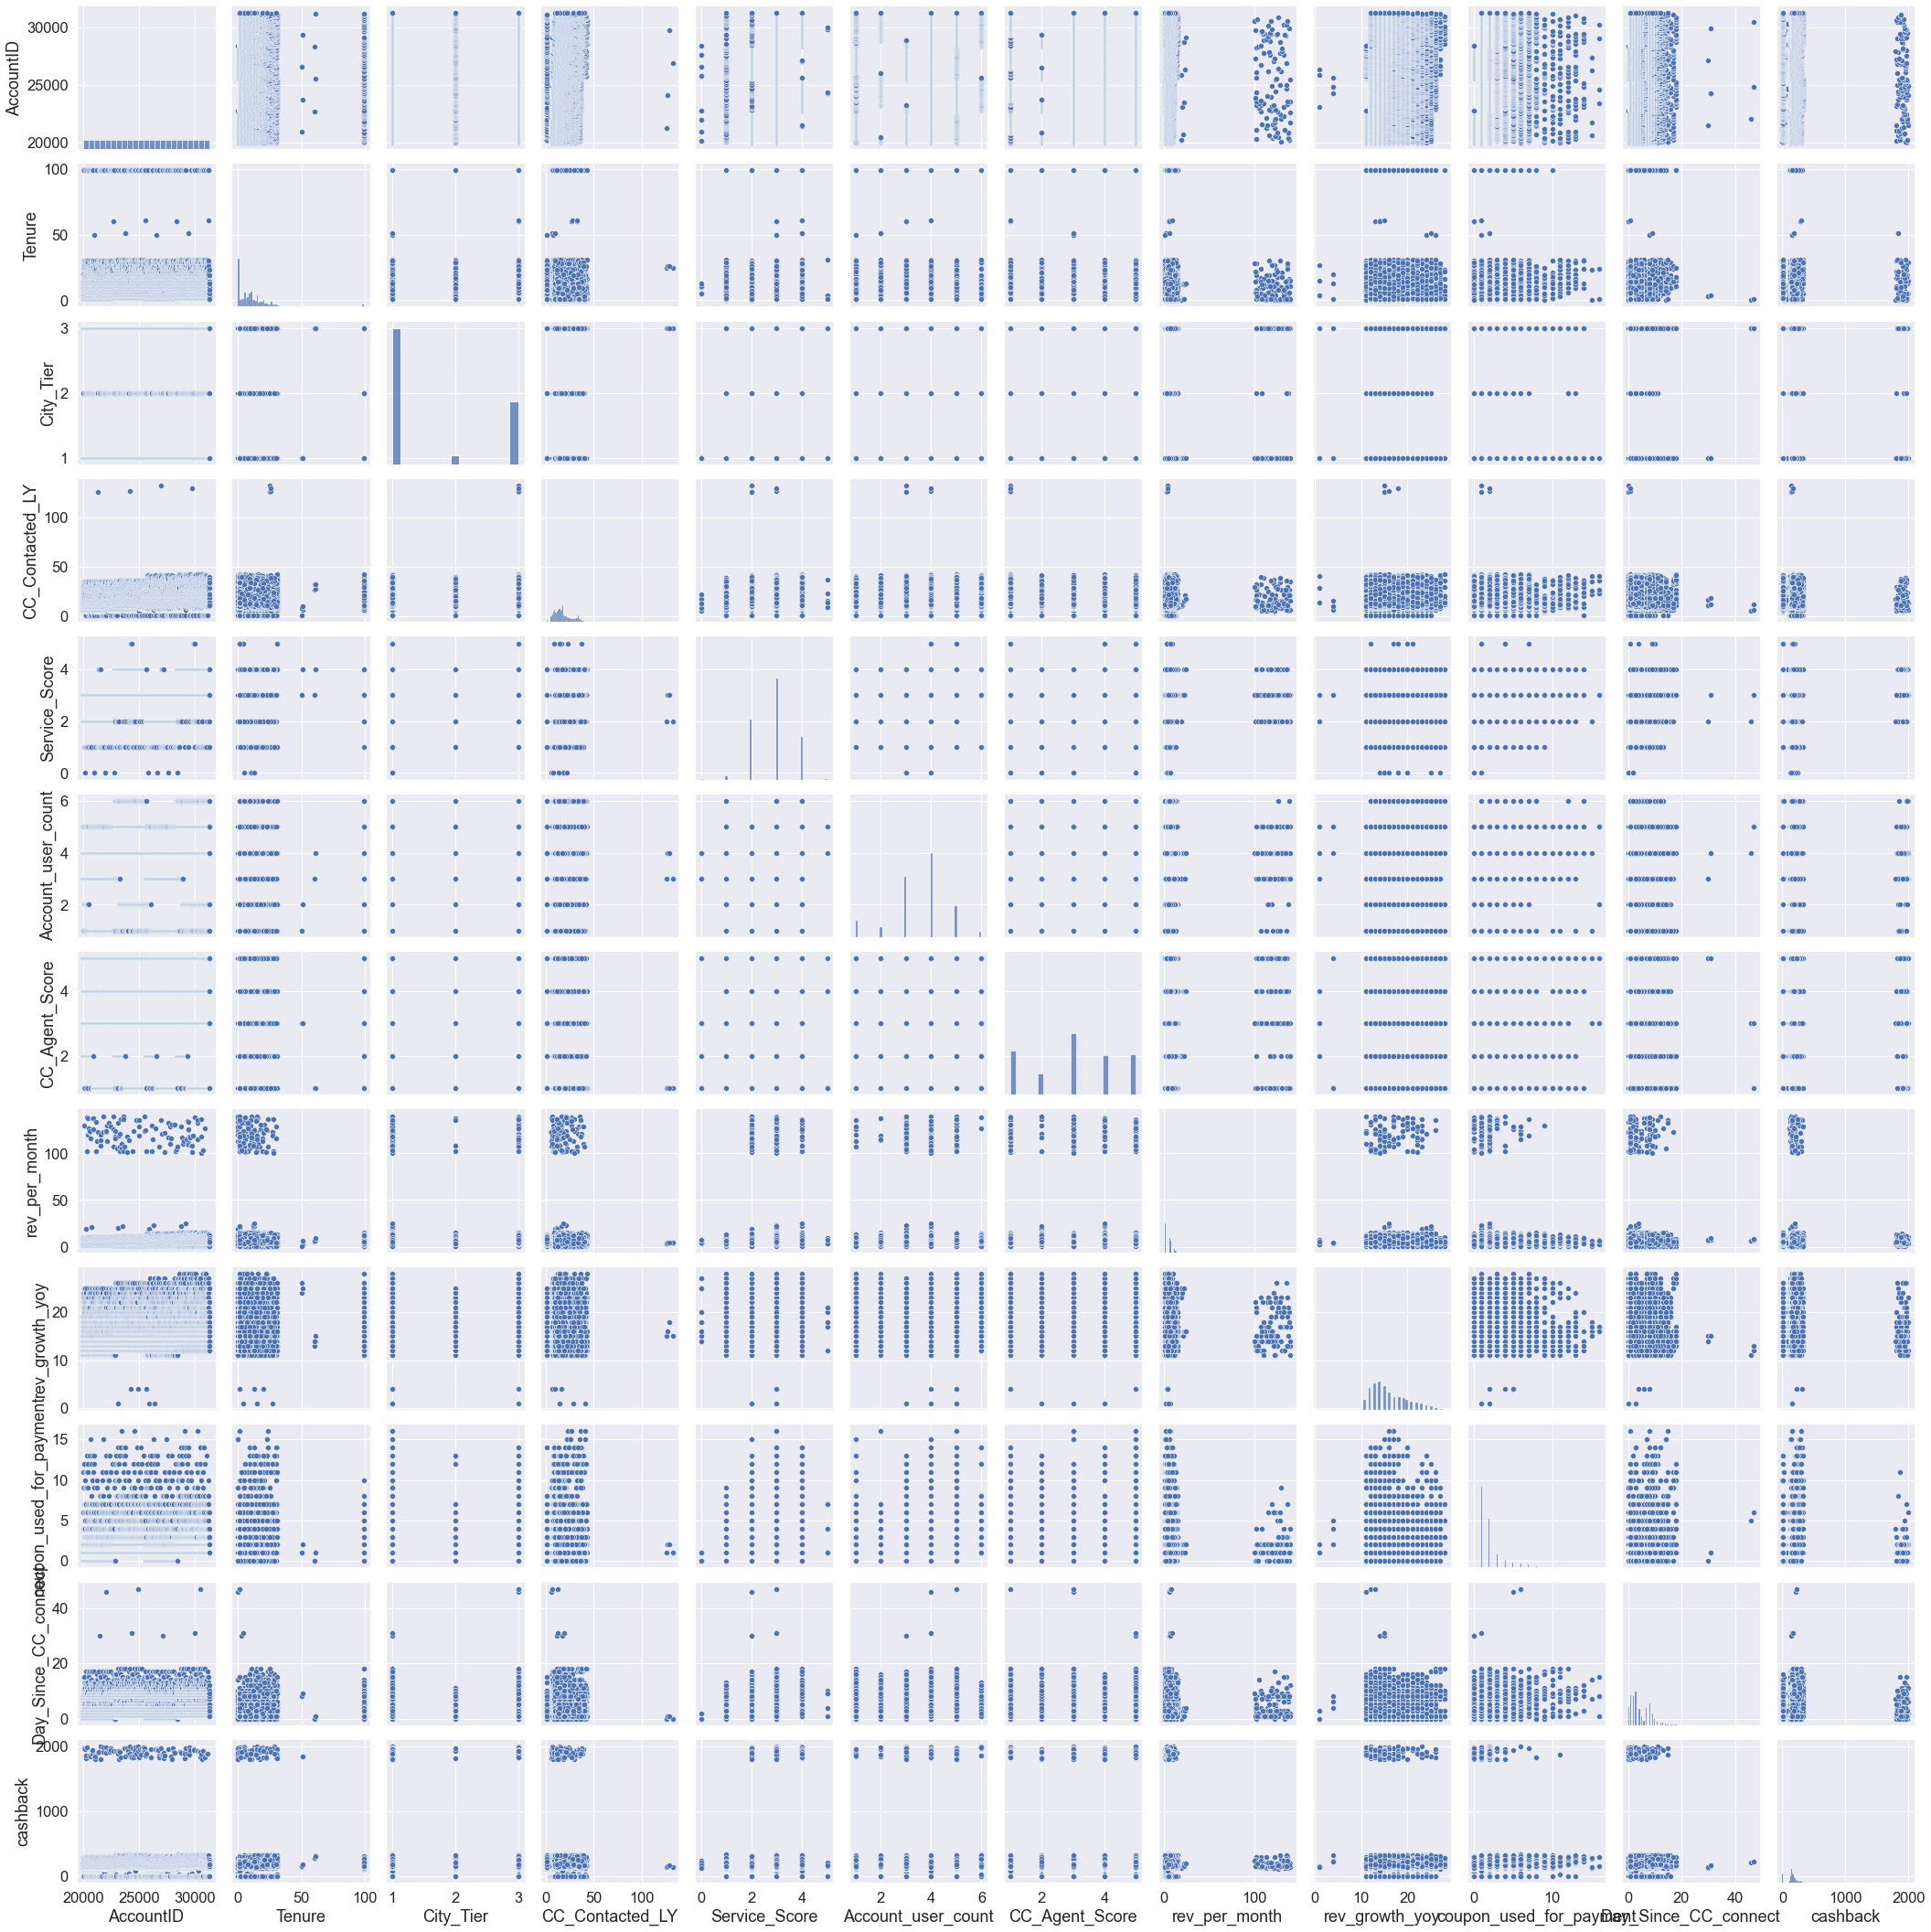

In [205]:
sns.pairplot(df2.drop(['Churn', 'Complain_ly'],axis=1))

### Encoding

For all the models encoding is to be done to convert all the non-numeric features to integer type

In [206]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  float64
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  float64
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  float64
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

In [207]:
for i in df2.columns: 
    if df2[i].dtype == 'object': 
        print('\n')
        print('feature:',i)
        print(pd.Categorical(df2[i].unique()))
        print(pd.Categorical(df2[i].unique()).codes)
        df2[i] = pd.Categorical(df2[i]).codes



feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet', 1.0]
Categories (6, object): [1.0, 'Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[3 5 2 1 4 0]


feature: Gender
['Female', 'Male', 1.0]
Categories (3, object): [1.0, 'Female', 'Male']
[1 2 0]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 1.0, 'Super Plus']
Categories (6, object): [1.0, 'HNI', 'Regular', 'Regular Plus', 'Super', 'Super Plus']
[4 3 2 1 0 5]


feature: Marital_Status
['Single', 'Divorced', 'Married', 1.0]
Categories (4, object): [1.0, 'Divorced', 'Married', 'Single']
[3 1 2 0]


feature: Login_device
['Mobile', 'Computer', 1.0]
Categories (3, object): [1.0, 'Computer', 'Mobile']
[2 1 0]


In [208]:
df2.isna().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [209]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  float64
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  int8   
 6   Gender                   11260 non-null  int8   
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  float64
 9   account_segment          11260 non-null  int8   
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  int8   
 12  rev_per_month            11260 non-null  float64
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

As can be seen here all the features are converted to numeric type

## Notes -2 
## Splitting the data

#### Extracting the target column into separate vectors for training set and test set

In [399]:
X = df2.drop(["Churn","AccountID"], axis=1)

y = df2.pop("Churn")

X.head()

KeyError: "['Churn'] not found in axis"

#### Splitting data into training, test & validation set in a ratio of 70:15:15

In [500]:
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=.70, random_state=1)

In [501]:

X_test, X_valid, y_test, y_valid = train_test_split(X_rem, y_rem, test_size=.50, random_state=1)

#### Checking the dimensions of the training and test data

In [213]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('X_valid',X_valid.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('y_valid',y_valid.shape)
print('Total Obs',X_train.shape[0]+X_test.shape[0]+X_valid.shape[0])

X_train (7881, 18)
X_test (1689, 18)
X_valid (1690, 18)
y_train (7881,)
y_test (1689,)
y_valid (1690,)
Total Obs 11260


### Making different Basic Models
### 1. CART

#### Building a Decision Tree Classifier

In [232]:
# Initialise a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(criterion='gini')

In [233]:
# Fit the model

dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [234]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train))

ld_Tree_File.close()


In [235]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                              Imp
Tenure                   0.303632
Day_Since_CC_connect     0.072568
rev_growth_yoy           0.066834
cashback                 0.060643
CC_Agent_Score           0.058469
Complain_ly              0.057695
CC_Contacted_LY          0.049983
rev_per_month            0.048147
Payment                  0.044498
Marital_Status           0.042420
account_segment          0.036489
AccountID                0.029199
Account_user_count       0.029110
Login_device             0.027597
City_Tier                0.022268
Gender                   0.020048
coupon_used_for_payment  0.015799
Service_Score            0.014602


#### Predict using test data

In [236]:
y_predict=dt_model.predict(X_test)

In [237]:
y_predict_train=dt_model.predict(X_train)

In [238]:
#### Confusion Matrix

In [239]:
from sklearn.metrics import classification_report,confusion_matrix

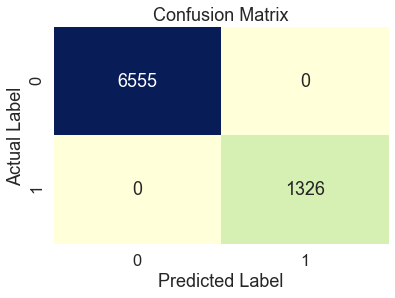

In [240]:
sns.heatmap(confusion_matrix(y_train,y_predict_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [241]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7881
   macro avg       1.00      1.00      1.00      7881
weighted avg       1.00      1.00      1.00      7881



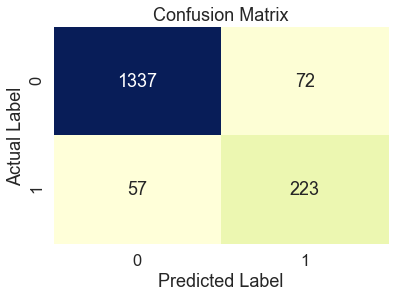

In [242]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [243]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1409
           1       0.76      0.80      0.78       280

    accuracy                           0.92      1689
   macro avg       0.86      0.87      0.86      1689
weighted avg       0.93      0.92      0.92      1689



#### AUC and ROC for the training data

AUC: 1.000


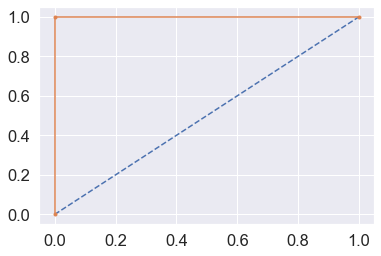

In [244]:
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### AUC and ROC for the test data

AUC: 0.873


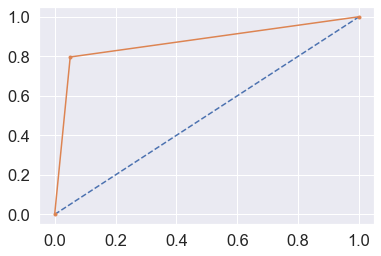

In [245]:
# predict probabilities
probs2 = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2 = roc_auc_score(y_test, probs2)
print('AUC: %.3f' % auc2)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr2, tpr2, marker='.')
# show the plot
plt.show()

### Adding Tuning Parameters

In [542]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=100,min_samples_split=1000, random_state=1)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000, random_state=1)

### Generating New Tree

In [543]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train))

ld_tree_regularized.close()
dot_data

### Variable Importance

In [544]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                              Imp
Tenure                   0.737411
Complain_ly              0.167991
Day_Since_CC_connect     0.042332
rev_per_month            0.024850
Marital_Status           0.012897
coupon_used_for_payment  0.004359
account_segment          0.003415
CC_Agent_Score           0.002506
Payment                  0.001803
City_Tier                0.001672
CC_Contacted_LY          0.000736
Service_Score            0.000029
Account_user_count       0.000000
Gender                   0.000000
rev_growth_yoy           0.000000
cashback                 0.000000
Login_device             0.000000


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


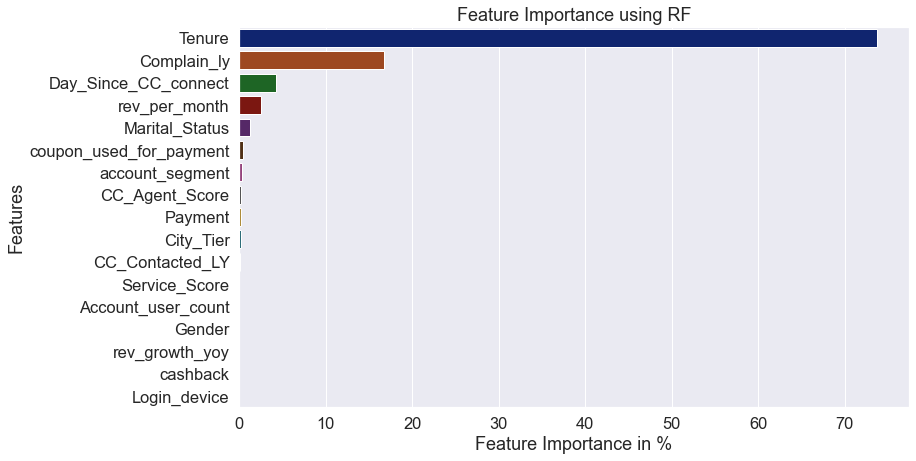

In [545]:
x=pd.DataFrame(reg_dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

#### Predictions

In [250]:
y_predict=reg_dt_model.predict(X_test)
y_predict_train=reg_dt_model.predict(X_train)

#### Performance Evaluation

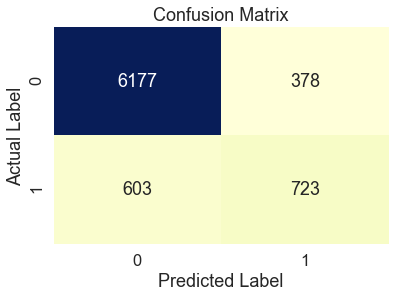

In [251]:
sns.heatmap(confusion_matrix(y_train,y_predict_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [253]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6555
           1       0.66      0.55      0.60      1326

    accuracy                           0.88      7881
   macro avg       0.78      0.74      0.76      7881
weighted avg       0.87      0.88      0.87      7881



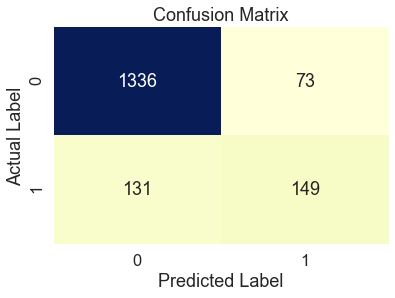

In [252]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [254]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1409
           1       0.67      0.53      0.59       280

    accuracy                           0.88      1689
   macro avg       0.79      0.74      0.76      1689
weighted avg       0.87      0.88      0.87      1689



AUC: 0.880


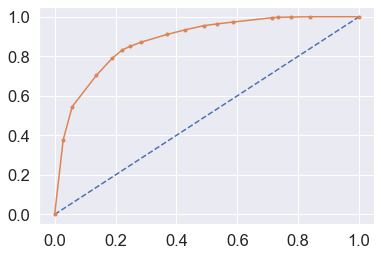

In [255]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.880


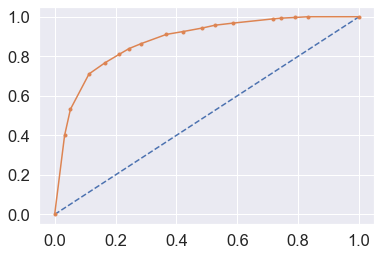

In [256]:
# predict probabilities
probs2 = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2 = roc_auc_score(y_test, probs2)
print('AUC: %.3f' % auc2)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr2, tpr2, marker='.')
# show the plot
plt.show()

## Random Forest

In [258]:
from sklearn.ensemble import RandomForestClassifier

In [307]:
rfcl = RandomForestClassifier(n_estimators=500,criterion='gini',random_state=1)
rfcl = rfcl.fit(X_train,y_train)

In [308]:
ytrain_predict =rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

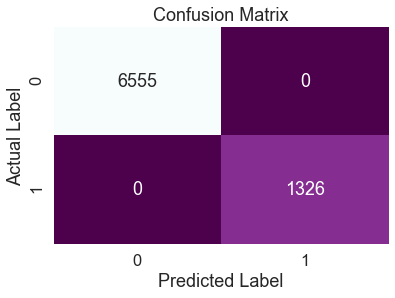

In [309]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='BuPu_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [310]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7881
   macro avg       1.00      1.00      1.00      7881
weighted avg       1.00      1.00      1.00      7881



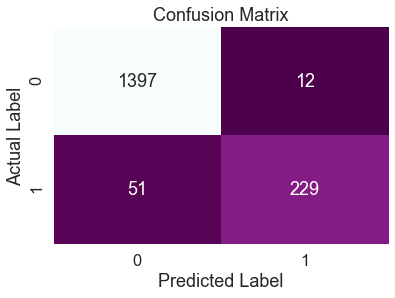

In [311]:
# Get the confusion matrix on the train data
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='BuPu_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [312]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1409
           1       0.95      0.82      0.88       280

    accuracy                           0.96      1689
   macro avg       0.96      0.90      0.93      1689
weighted avg       0.96      0.96      0.96      1689



AUC: 1.000


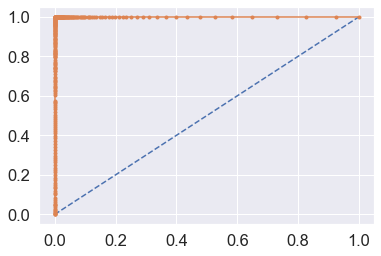

In [313]:
# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.988


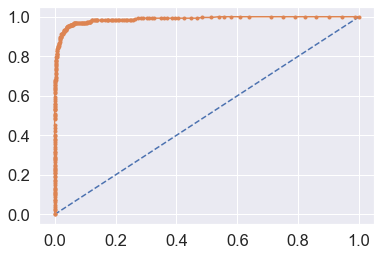

In [314]:
# predict probabilities
probs2 = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2 = roc_auc_score(y_test, probs2)
print('AUC: %.3f' % auc2)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr2, tpr2, marker='.')
# show the plot
plt.show()

### HyperTuning Random Forest

In [286]:
rfcl2=RandomForestClassifier()

In [288]:
from sklearn.model_selection import GridSearchCV

In [315]:

param_grid = {
    'max_depth': [7, 10,15],
    'max_features': [4, 6, 8],
    'min_samples_leaf': [30, 50, 100],
    'min_samples_split': [120, 150, 300],
    'n_estimators': [50, 100, 300, 500]
}

In [316]:
grid_search = GridSearchCV(estimator = rfcl2, param_grid = param_grid, cv = 3)

In [318]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10, 15], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [30, 50, 100],
                         'min_samples_split': [120, 150, 300],
                         'n_estimators': [50, 100, 300, 500]})

In [319]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 30,
 'min_samples_split': 120,
 'n_estimators': 100}

In [320]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=30,
                       min_samples_split=120)

In [321]:
ytrain_predict2 = best_grid.predict(X_train)
ytest_predict2 = best_grid.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


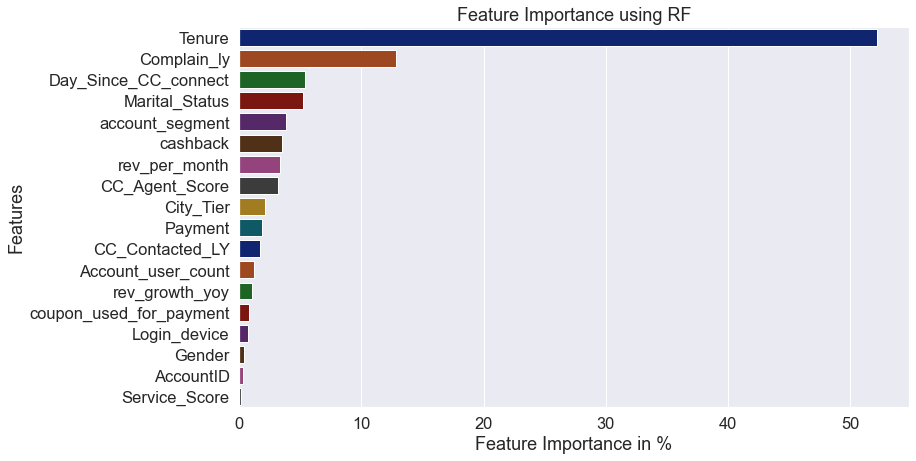

In [297]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

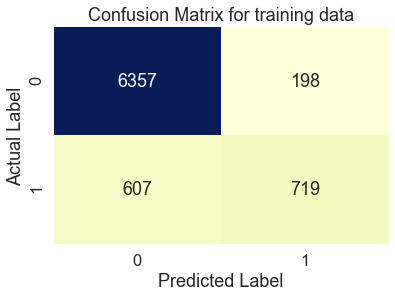

In [298]:
#confusion_matrix(train_labels,ytrain_predict2)
sns.heatmap(confusion_matrix(y_train,ytrain_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data')
plt.show()

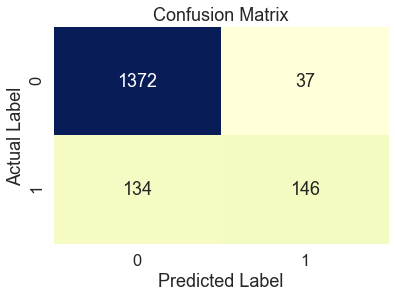

In [299]:
#confusion_matrix(train_labels,ytrain_predict2)
sns.heatmap(confusion_matrix(y_test,ytest_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [300]:
print(classification_report(y_train,ytrain_predict2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6555
           1       0.78      0.54      0.64      1326

    accuracy                           0.90      7881
   macro avg       0.85      0.76      0.79      7881
weighted avg       0.89      0.90      0.89      7881



In [301]:
print(classification_report(y_test,ytest_predict2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1409
           1       0.80      0.52      0.63       280

    accuracy                           0.90      1689
   macro avg       0.85      0.75      0.79      1689
weighted avg       0.89      0.90      0.89      1689



AUC: 0.940


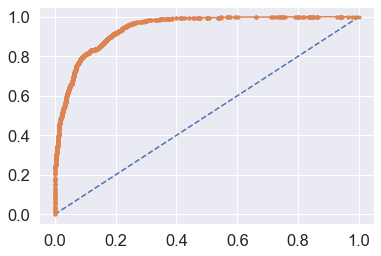

In [303]:
# AUC and ROC for the training data

# predict probabilities
probs2_train = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs2_train = probs2_train[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2_train = roc_auc_score(y_train, probs2_train)
print('AUC: %.3f' % auc2_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs2_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.930


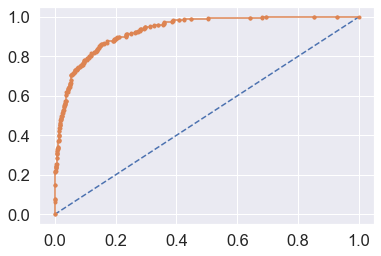

In [305]:
# predict probabilities
probs2_test = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2_test = probs2_test[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2_test = roc_auc_score(y_test, probs2_test)
print('AUC: %.3f' % auc2_test)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs2_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Logistic Regression

In [322]:
from sklearn.linear_model import LogisticRegression

### With only default parameters

In [346]:
logit_model = LogisticRegression()

In [347]:
logit_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [348]:
y_predict_train = logit_model.predict(X_train)
y_predict = logit_model.predict(X_test)

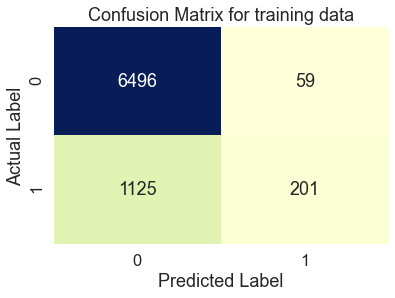

In [349]:
sns.heatmap(confusion_matrix(y_train,y_predict_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data')
plt.show()

In [350]:
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      6555
           1       0.77      0.15      0.25      1326

    accuracy                           0.85      7881
   macro avg       0.81      0.57      0.58      7881
weighted avg       0.84      0.85      0.80      7881



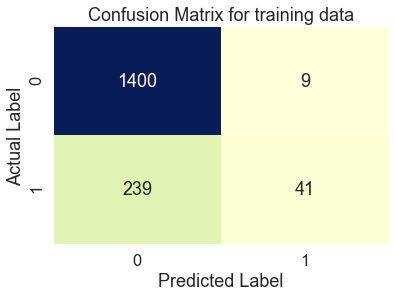

In [351]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data')
plt.show()

In [331]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1409
           1       0.82      0.15      0.25       280

    accuracy                           0.85      1689
   macro avg       0.84      0.57      0.58      1689
weighted avg       0.85      0.85      0.81      1689



AUC: 0.817


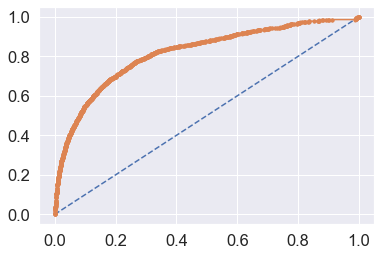

In [334]:
# AUC and ROC for the training data

# predict probabilities
probs2_train = logit_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs2_train = probs2_train[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2_train = roc_auc_score(y_train, probs2_train)
print('AUC: %.3f' % auc2_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs2_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.830


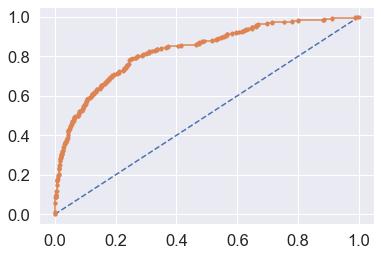

In [335]:
# predict probabilities
probs2_test = logit_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2_test = probs2_test[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2_test = roc_auc_score(y_test, probs2_test)
print('AUC: %.3f' % auc2_test)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs2_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### With some control parameters

In [370]:
logit_model2 = LogisticRegression(solver='newton-cg',max_iter=10000, penalty='l2',n_jobs=2)
#lbfgs, liblinear,newton-cg

In [371]:
logit_model2.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg')

In [372]:
y_predict_train2 = logit_model2.predict(X_train)
y_predict2 = logit_model2.predict(X_test)

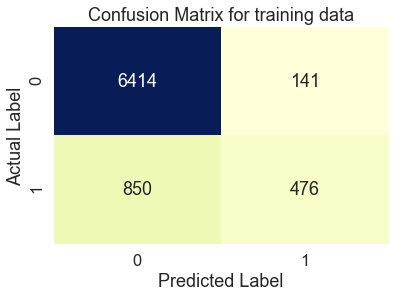

In [373]:
sns.heatmap(confusion_matrix(y_train,y_predict_train2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data')
plt.show()

In [357]:
print(classification_report(y_train,y_predict_train2))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6555
           1       0.77      0.36      0.49      1326

    accuracy                           0.87      7881
   macro avg       0.83      0.67      0.71      7881
weighted avg       0.86      0.87      0.85      7881



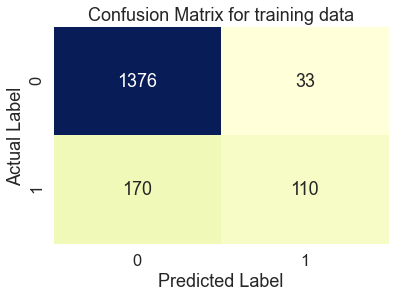

In [358]:
sns.heatmap(confusion_matrix(y_test,y_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for training data')
plt.show()

In [359]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1409
           1       0.77      0.39      0.52       280

    accuracy                           0.88      1689
   macro avg       0.83      0.68      0.73      1689
weighted avg       0.87      0.88      0.86      1689



AUC: 0.854


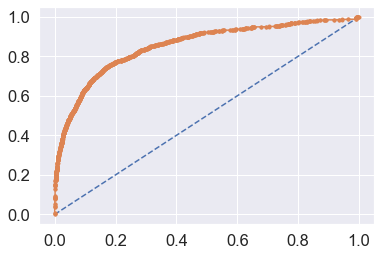

In [360]:
# AUC and ROC for the training data

# predict probabilities
probs2_train = logit_model2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs2_train = probs2_train[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2_train = roc_auc_score(y_train, probs2_train)
print('AUC: %.3f' % auc2_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs2_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.859


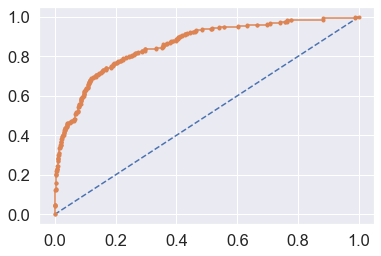

In [361]:
# predict probabilities
probs2_test = logit_model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2_test = probs2_test[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2_test = roc_auc_score(y_test, probs2_test)
print('AUC: %.3f' % auc2_test)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs2_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Hyper Tuned Logistics Regression

In [412]:
#X_train.drop('AccountID',axis=1,inplace=True)
#X_test.drop('AccountID',axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [448]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7881, 17)
(7881,)
(1689, 17)
(1689,)


In [404]:
grid={'penalty':['l2','none'],
      'solver':['sag','newton-cg','liblinear'],
      'tol':[0.0001,0.00001]}

In [405]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [406]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1)

In [449]:
grid_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.86296155 0.86524553 0.87222434 0.87222434 0.87146301 0.8715899
 0.86258089 0.86511864 0.87209745 0.87209745        nan        nan]
  category=UserWarning


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'newton-cg', 'liblinear'],
                         'tol': [0.0001, 1e-05]})

In [450]:
best_model = grid_search.best_estimator_

In [451]:
 grid_search.best_estimator_

LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg')

In [452]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [453]:
from sklearn.metrics import plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6555
           1       0.77      0.36      0.49      1326

    accuracy                           0.87      7881
   macro avg       0.82      0.67      0.71      7881
weighted avg       0.86      0.87      0.85      7881
 



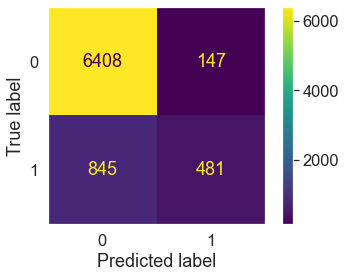

In [454]:

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');
plt.grid(None)

AUC: 0.854


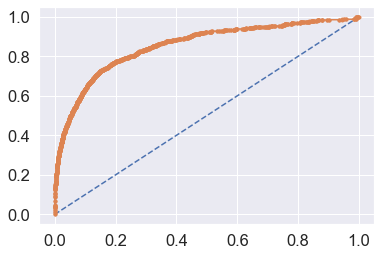

In [455]:
# AUC and ROC for the training data

# predict probabilities
probs2_train = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs2_train = probs2_train[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2_train = roc_auc_score(y_train, probs2_train)
print('AUC: %.3f' % auc2_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs2_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1409
           1       0.78      0.38      0.51       280

    accuracy                           0.88      1689
   macro avg       0.83      0.68      0.72      1689
weighted avg       0.87      0.88      0.86      1689
 



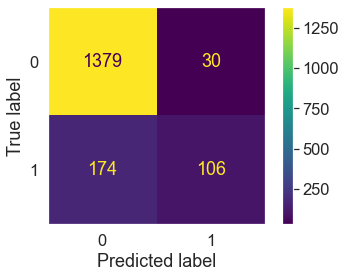

In [416]:
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)

AUC: 0.817


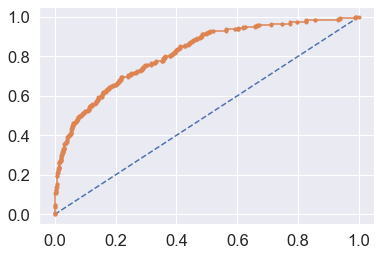

In [575]:
# AUC and ROC for the training data

# predict probabilities
probs2_test = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2_test = probs2_test[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2_train = roc_auc_score(y_test, probs2_test)
print('AUC: %.3f' % auc2_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs2_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Remodelling after removing outliers

In [397]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7881 entries, 5198 to 235
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                7881 non-null   int64  
 1   Tenure                   7881 non-null   float64
 2   City_Tier                7881 non-null   float64
 3   CC_Contacted_LY          7881 non-null   float64
 4   Payment                  7881 non-null   int8   
 5   Gender                   7881 non-null   int8   
 6   Service_Score            7881 non-null   float64
 7   Account_user_count       7881 non-null   float64
 8   account_segment          7881 non-null   int8   
 9   CC_Agent_Score           7881 non-null   float64
 10  Marital_Status           7881 non-null   int8   
 11  rev_per_month            7881 non-null   float64
 12  Complain_ly              7881 non-null   float64
 13  rev_growth_yoy           7881 non-null   float64
 14  coupon_used_for_paymen

<AxesSubplot:>

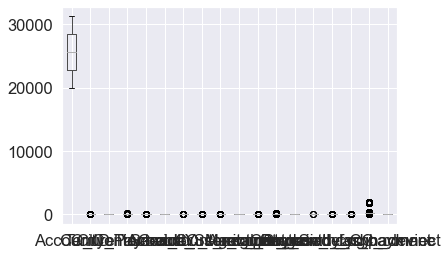

In [417]:
df2.boxplot()

In [419]:
X.drop('AccountID',axis=1,inplace=True)

In [420]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.0,3.0,6.0,3,1,3.0,3.0,4,2.0,3,9.0,1.0,11.0,1.0,5.0,159.93,2
1,0.0,1.0,8.0,5,2,3.0,4.0,3,3.0,3,7.0,1.0,15.0,0.0,0.0,120.90,2
2,0.0,1.0,30.0,3,2,2.0,4.0,3,3.0,3,6.0,1.0,14.0,0.0,3.0,1.00,2
3,0.0,3.0,15.0,3,2,2.0,4.0,4,5.0,3,8.0,0.0,23.0,0.0,3.0,134.07,2
4,0.0,1.0,12.0,2,2,2.0,3.0,3,5.0,3,3.0,0.0,11.0,1.0,3.0,129.60,2


In [422]:
X_no_outlier=X.drop(['City_Tier', 'Payment', 'Gender', 'account_segment', 'Marital_Status', 'Complain_ly', 'Login_device'],axis=1)

In [421]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lr,ur=remove_outlier(adult_data['working hours per week'])
print('Lower Range :',lr,'\nUpper Range :',ur)
adult_data['working hours per week']=np.where(adult_data['working hours per week']>ur,ur,adult_data['working hours per week'])
adult_data['working hours per week']=np.where(adult_data['working hours per week']<lr,lr,adult_data['working hours per week'])
Lower Range : 26.0 
Upper Range : 58.0

In [423]:
for column in X_no_outlier:
    lr,ur=remove_outlier(X_no_outlier[column])
    X_no_outlier[column]=np.where(X_no_outlier[column]>ur,ur,X_no_outlier[column])
    X_no_outlier[column]=np.where(X_no_outlier[column]<lr,lr,X_no_outlier[column])

<AxesSubplot:>

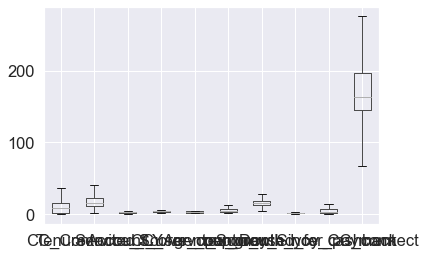

In [424]:
X_no_outlier.boxplot()

In [425]:
grid={'penalty':['l2','none'],
      'solver':['sag','newton-cg','liblinear'],
      'tol':[0.0001,0.00001]}

In [426]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [483]:
# Split X and y into training and test set in 70:30 ratio
X_train_noout, X_test_noout, y_train, y_test = train_test_split(X_no_outlier, y, test_size=0.30 , random_state=1)



In [429]:
grid_search.fit(X_train_noout, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.8449628  0.84585116 0.84585116 0.84585116 0.845978   0.845978
 0.8449628  0.84585116 0.84585116 0.84585116        nan        nan]
  category=UserWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1357: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'newton-cg', 'liblinear'],
                         'tol': [0.0001, 1e-05]})

In [430]:
best_model_noout = grid_search.best_estimator_

In [431]:
ytrain_predict_noout =best_model_noout.predict(X_train_noout)
ytest_predict_noout = best_model_noout.predict(X_test_noout)

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6556
           1       0.66      0.18      0.29      1326

    accuracy                           0.85      7882
   macro avg       0.76      0.58      0.60      7882
weighted avg       0.82      0.85      0.81      7882
 



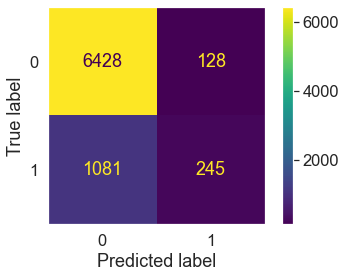

In [432]:

plot_confusion_matrix(best_model_noout,X_train_noout,y_train)
print(classification_report(y_train, ytrain_predict_noout),'\n');
plt.grid(None)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2808
           1       0.75      0.22      0.35       570

    accuracy                           0.86      3378
   macro avg       0.81      0.60      0.63      3378
weighted avg       0.84      0.86      0.82      3378
 



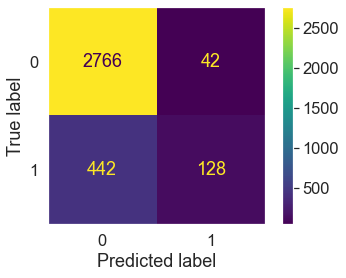

In [433]:
plot_confusion_matrix(best_model_noout,X_test_noout,y_test)
print(classification_report(y_test, ytest_predict_noout),'\n');
plt.grid(None)

### Basic LDA

In [458]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [478]:
#Build LDA Model
clf = LinearDiscriminantAnalysis(solver='lsqr',tol=0.00001)
lda_model=clf.fit(X_train,y_train)

In [479]:
pred_class_train = lda_model.predict(X_train)

pred_class_test = lda_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6555
           1       0.75      0.27      0.40      1326

    accuracy                           0.86      7881
   macro avg       0.81      0.63      0.66      7881
weighted avg       0.85      0.86      0.83      7881
 



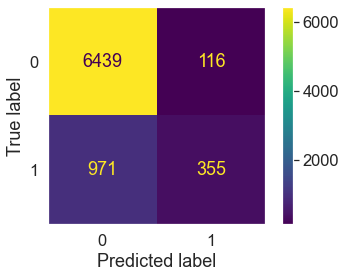

In [480]:

plot_confusion_matrix(lda_model,X_train,y_train)
print(classification_report(y_train, pred_class_train),'\n');
plt.grid(None)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1409
           1       0.73      0.28      0.40       280

    accuracy                           0.86      1689
   macro avg       0.80      0.63      0.66      1689
weighted avg       0.85      0.86      0.84      1689
 



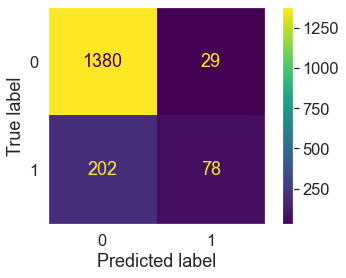

In [481]:
plot_confusion_matrix(lda_model,X_test,y_test)
print(classification_report(y_test, pred_class_test),'\n');
plt.grid(None)

AUC: 0.817


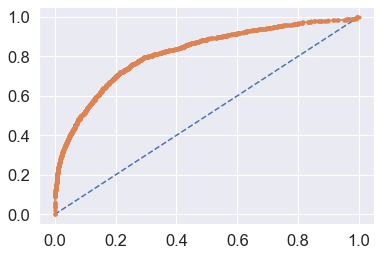

In [476]:
# AUC and ROC for the training data

# predict probabilities
probs2_train = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs2_train = probs2_train[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2_train = roc_auc_score(y_train, probs2_train)
print('AUC: %.3f' % auc2_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs2_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.817


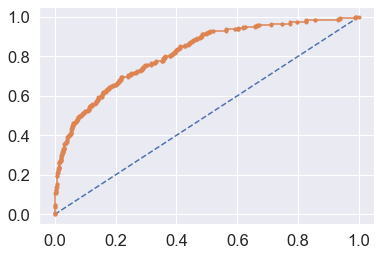

In [477]:
# AUC and ROC for the training data

# predict probabilities
probs2_test = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2_test = probs2_test[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2_test = roc_auc_score(y_test, probs2_test)
print('AUC: %.3f' % auc2_test)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs2_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Hypertuned LDA

In [519]:
clf2 = LinearDiscriminantAnalysis()

In [533]:
grid={'solver':['svd','lsqr', 'eigen'],
      'tol':[0.0001,0.00001]}

In [534]:
grid_search = GridSearchCV(estimator = clf2, param_grid = grid, cv = 3,n_jobs=-1)

In [535]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [570]:
best_model = grid_search.best_estimator_

In [571]:
 grid_search.best_estimator_

LinearDiscriminantAnalysis()

In [524]:
ytrain_predict =best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6555
           1       0.75      0.27      0.40      1326

    accuracy                           0.86      7881
   macro avg       0.81      0.63      0.66      7881
weighted avg       0.85      0.86      0.83      7881
 



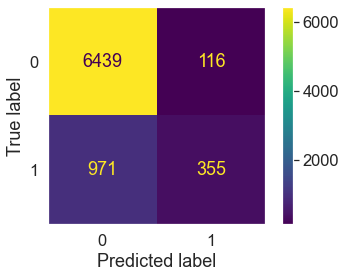

In [526]:
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');
plt.grid(None)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1409
           1       0.73      0.28      0.40       280

    accuracy                           0.86      1689
   macro avg       0.80      0.63      0.66      1689
weighted avg       0.85      0.86      0.84      1689
 



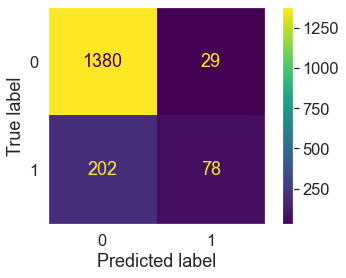

In [527]:
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)

AUC: 0.817


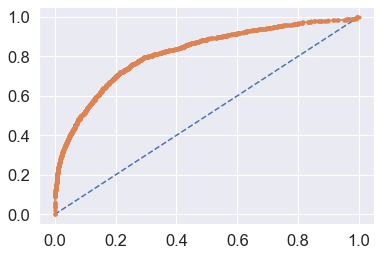

In [572]:
# AUC and ROC for the training data

# predict probabilities
probs2_train = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs2_train = probs2_train[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2_train = roc_auc_score(y_train, probs2_train)
print('AUC: %.3f' % auc2_train)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs2_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.817


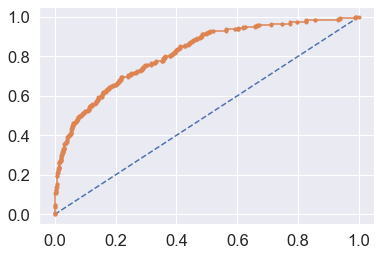

In [573]:
# AUC and ROC for the training data

# predict probabilities
probs2_test = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2_test = probs2_test[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc2_test = roc_auc_score(y_test, probs2_test)
print('AUC: %.3f' % auc2_test)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs2_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Remodelling after removing outliers

In [484]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
lda_model2=clf.fit(X_train_noout,y_train)

In [485]:
pred_class_train2 = lda_model2.predict(X_train_noout)

pred_class_test2 = lda_model2.predict(X_test_noout)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      6556
           1       0.71      0.09      0.16      1326

    accuracy                           0.84      7882
   macro avg       0.78      0.54      0.54      7882
weighted avg       0.82      0.84      0.79      7882
 



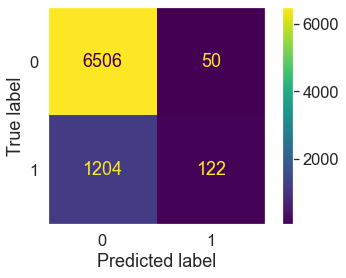

In [486]:

plot_confusion_matrix(lda_model2,X_train_noout,y_train)
print(classification_report(y_train, pred_class_train2),'\n');
plt.grid(None)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2808
           1       0.75      0.11      0.18       570

    accuracy                           0.84      3378
   macro avg       0.80      0.55      0.55      3378
weighted avg       0.83      0.84      0.79      3378
 



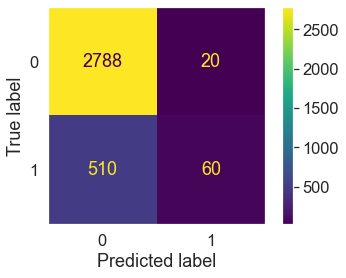

In [487]:

plot_confusion_matrix(lda_model2,X_test_noout,y_test)
print(classification_report(y_test, pred_class_test2),'\n');
plt.grid(None)

#### Let's try scaling the variables

In [489]:
from sklearn.preprocessing import StandardScaler

In [490]:
scale=StandardScaler()

In [506]:
scaled_X_train=scale.fit_transform(X_train)
scaled_X_test=scale.fit_transform(X_test)

In [507]:
scaled_X_train=pd.DataFrame(scaled_X_train,index=X_train.index,columns=X_train.columns)
scaled_X_test=pd.DataFrame(scaled_X_test,index=X_test.index,columns=X_test.columns)

In [508]:
scaled_X_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
5198,0.863730,1.491685,-0.411809,1.205513,0.804264,1.486243,0.363377,0.746791,1.404636,-0.165489,-0.005451,-0.664697,-1.119217,-0.402307,-0.406025,-0.045306,0.610627
1929,0.315664,-0.705282,-0.411809,0.253067,0.804264,0.142846,-0.512930,-0.994985,-1.474224,-0.165489,-0.343051,-0.664697,-0.851319,1.661873,1.223934,0.541951,-1.384543
3427,0.315664,-0.705282,-0.411809,-0.699379,-1.153846,0.142846,0.363377,0.746791,-0.034794,1.221979,0.163349,-0.664697,-0.315522,0.113738,-0.677684,-0.072465,0.610627
6249,-0.858763,-0.705282,0.491749,-0.699379,-1.153846,0.142846,1.239684,0.746791,0.684921,-1.552957,-0.005451,-0.664697,-0.315522,-0.402307,-1.221004,-0.214500,0.610627
9843,-0.154107,-0.705282,0.717638,-0.699379,0.804264,1.486243,1.239684,-1.865873,1.404636,-0.165489,0.078949,1.504445,-0.047624,0.113738,-0.134365,0.213235,-1.384543


In [509]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
lda_model_scaled=clf.fit(scaled_X_train,y_train)

In [510]:
pred_class_train3 = lda_model_scaled.predict(scaled_X_train)

pred_class_test3 = lda_model_scaled.predict(scaled_X_test)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6555
           1       0.75      0.27      0.40      1326

    accuracy                           0.86      7881
   macro avg       0.81      0.63      0.66      7881
weighted avg       0.85      0.86      0.83      7881
 



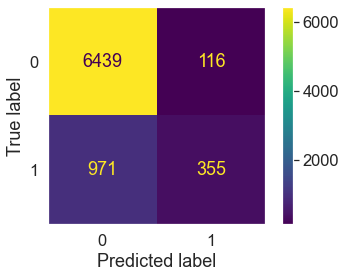

In [512]:

plot_confusion_matrix(lda_model_scaled,scaled_X_train,y_train)
print(classification_report(y_train, pred_class_train3),'\n');
plt.grid(None)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1409
           1       0.76      0.29      0.42       280

    accuracy                           0.87      1689
   macro avg       0.82      0.63      0.67      1689
weighted avg       0.86      0.87      0.84      1689
 



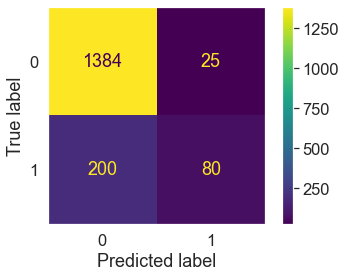

In [513]:

plot_confusion_matrix(lda_model_scaled,scaled_X_test,y_test)
print(classification_report(y_test, pred_class_test3),'\n');
plt.grid(None)

## Bagging using Random Forest

In [546]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [547]:
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [548]:
Bagging_ytrain_predict = Bagging_model.predict(X_train)
Bagging_ytest_predict = Bagging_model.predict(X_test)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7881
   macro avg       1.00      1.00      1.00      7881
weighted avg       1.00      1.00      1.00      7881



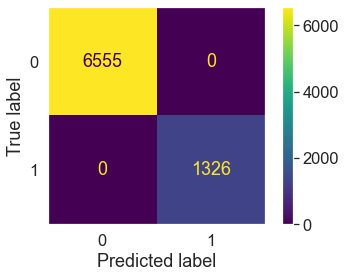

In [549]:
Bagging_score=Bagging_model.score(X_train,y_train)
print(Bagging_score)
plot_confusion_matrix(Bagging_model,X_train,y_train)
print(classification_report(y_train,Bagging_ytrain_predict))
plt.grid(None)

In [553]:
from sklearn import metrics

AUC for the Training Data: 1.000


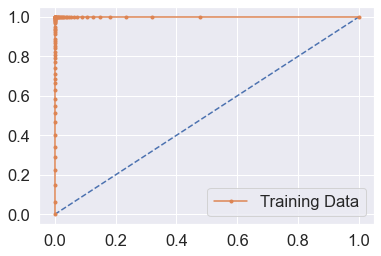

In [554]:
# Training Data Probability Prediction
pred_prob_train = Bagging_model.predict_proba(X_train)
#AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.9656601539372409
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1409
           1       0.94      0.85      0.89       280

    accuracy                           0.97      1689
   macro avg       0.95      0.92      0.94      1689
weighted avg       0.97      0.97      0.96      1689



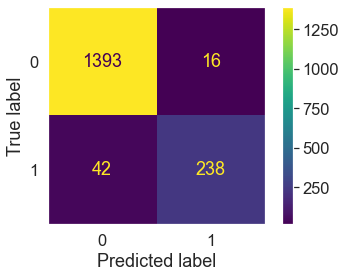

In [551]:
Bagging_score=Bagging_model.score(X_test,y_test)
print(Bagging_score)
plot_confusion_matrix(Bagging_model,X_test,y_test)
print(classification_report(y_test,Bagging_ytest_predict))
plt.grid(None)

AUC for the Test Data: 0.983


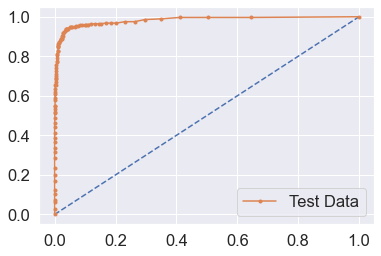

In [555]:
# Test Data Probability Prediction
pred_prob_test = Bagging_model.predict_proba(X_test)
#AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Ada Boost

In [556]:
from sklearn.ensemble import AdaBoostClassifier

In [557]:
ADB_model = AdaBoostClassifier(n_estimators=50,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [558]:
ADB_ytrain_predict = ADB_model.predict(X_train)
ADB_ytest_predict = ADB_model.predict(X_test)

0.8962060652201497
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.74      0.58      0.65      1326

    accuracy                           0.90      7881
   macro avg       0.83      0.77      0.80      7881
weighted avg       0.89      0.90      0.89      7881



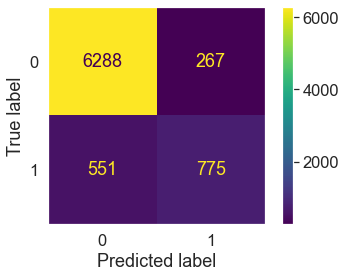

In [559]:
## Performance Matrix on train data set
ADB_score = ADB_model.score(X_train, y_train)
print(ADB_score)
plot_confusion_matrix(ADB_model,X_train,y_train)
print(classification_report(y_train,ADB_ytrain_predict))

plt.grid(None)

AUC for the Training Data: 0.915


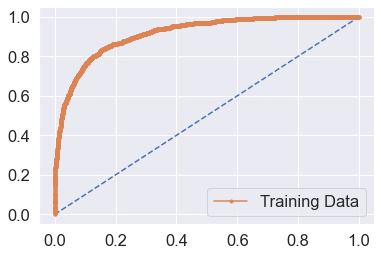

In [560]:
# Training Data Probability Prediction
pred_prob_train = ADB_model.predict_proba(X_train)
#AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.8993487270574304
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1409
           1       0.75      0.58      0.66       280

    accuracy                           0.90      1689
   macro avg       0.84      0.77      0.80      1689
weighted avg       0.89      0.90      0.89      1689



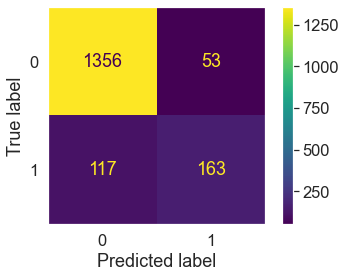

In [561]:
## Performance Matrix on test data set
ADB_score = ADB_model.score(X_test,y_test)
print(ADB_score)
plot_confusion_matrix(ADB_model,X_test,y_test)
print(classification_report(y_test,ADB_ytest_predict))
plt.grid(None)

AUC for the Test Data: 0.914


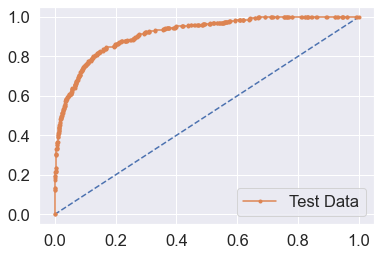

In [562]:
# Test Data Probability Prediction
pred_prob_test = ADB_model.predict_proba(X_test)
#AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Gradient Boosting

In [563]:
from sklearn.ensemble import GradientBoostingClassifier

In [564]:
gbcl_model = GradientBoostingClassifier(random_state=1)
gbcl_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [565]:
gbcl_ytrain_predict = gbcl_model.predict(X_train)
gbcl_ytest_predict = gbcl_model.predict(X_test)

0.9190458063697501
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6555
           1       0.84      0.64      0.73      1326

    accuracy                           0.92      7881
   macro avg       0.89      0.81      0.84      7881
weighted avg       0.92      0.92      0.91      7881



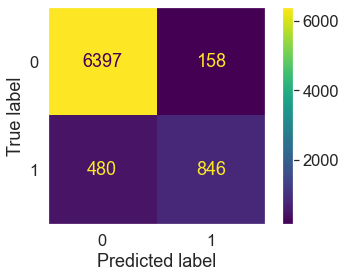

In [566]:
gbcl_score=gbcl_model.score(X_train,y_train)
print(gbcl_score)
plot_confusion_matrix(gbcl_model,X_train,y_train)
print(classification_report(y_train,gbcl_ytrain_predict))
plt.grid(None)

AUC for the Training Data: 0.948


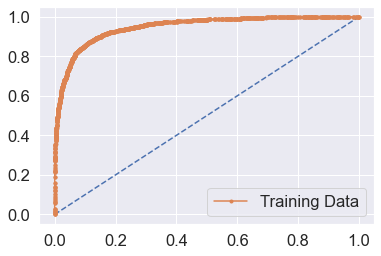

In [567]:
# Training Data Probability Prediction
pred_prob_train = gbcl_model.predict_proba(X_train)
#AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.9105979869745412
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1409
           1       0.82      0.59      0.68       280

    accuracy                           0.91      1689
   macro avg       0.87      0.78      0.82      1689
weighted avg       0.91      0.91      0.90      1689



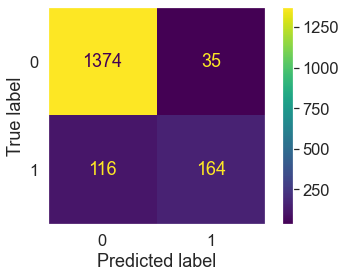

In [568]:
gbcl_score=gbcl_model.score(X_test,y_test)
print(gbcl_score)
plot_confusion_matrix(gbcl_model,X_test,y_test)
print(classification_report(y_test,gbcl_ytest_predict))
plt.grid(None)

AUC for the Test Data: 0.933


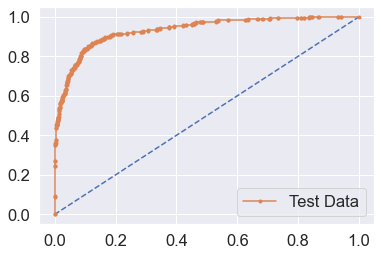

In [569]:
# Test Data Probability Prediction
pred_prob_test = gbcl_model.predict_proba(X_test)
#AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## SMOTE

In [576]:
from imblearn.over_sampling import SMOTE

In [587]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
X_test_res, y_test_res = sm.fit_resample(X_test, y_test)

In [581]:
rfcl_sm_model = RandomForestClassifier(n_estimators = 500, random_state=0)
rfcl_sm_model = rfcl.fit(X_train_res,y_train_res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



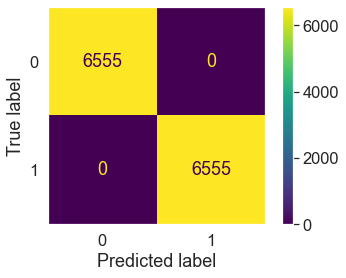

In [589]:
## Performance Matrix on train data set
y_train_predict = rfcl_sm_model.predict(X_train_res)

#print(metrics.confusion_matrix(y_train_res, y_train_predict))
plot_confusion_matrix(rfcl_sm_model,X_train_res,y_train_res)
print(metrics.classification_report(y_train_res ,y_train_predict))
plt.grid(None)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1409
           1       0.99      0.95      0.97      1409

    accuracy                           0.97      2818
   macro avg       0.97      0.97      0.97      2818
weighted avg       0.97      0.97      0.97      2818



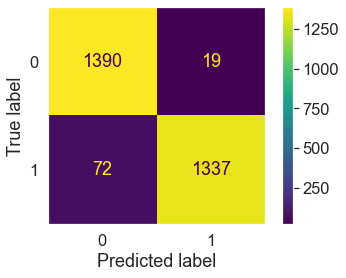

In [592]:
## Performance Matrix on test data set
y_test_predict = rfcl_sm_model.predict(X_test_res)

plot_confusion_matrix(rfcl_sm_model,X_test_res,y_test_res)
print(metrics.classification_report(y_test_res, y_test_predict))
plt.grid(None)

AUC for the Training Data: 1.000


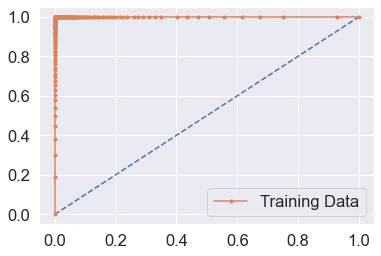

In [594]:
# Training Data Probability Prediction
pred_prob_train = rfcl_sm_model.predict_proba(X_train_res)
#AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train_res,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# show the plot
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.996


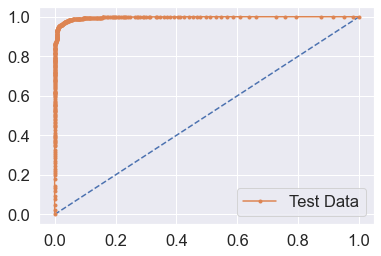

In [596]:
# Test Data Probability Prediction
pred_prob_test = rfcl_sm_model.predict_proba(X_test_res)
#AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test_res,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_res,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()